In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import tqdm
import math

In [156]:
global epsilon 
global num_samples
global n
global p

num_samples=100000
n=10
p=0.90
epsilon=0.05

In [82]:
# a helper function to convert an array to a string
def get_string(arr):
    return "".join([str(x) for x in arr])

# generate bernoulli rvs of arbitrary length with arbitray pmf
# return a list of sequence of bernoulli rvs
def bernoulli_seq(n,p,num_samples=int(1e6)):
    seq_arr=[]
    for i in tqdm.tqdm(range(num_samples)):
        seq_of_bernoulli_rv=bernoulli.rvs(p, size=n)
        string_seq=get_string(seq_of_bernoulli_rv)
        seq_arr.append(string_seq)
    return np.array(seq_arr)
    

In [92]:
s=bernoulli_seq(n,p,num_samples)
print(s)



  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

  7%|████▉                                                                       | 655/10000 [00:00<00:01, 6515.29it/s]

 15%|███████████▏                                                               | 1492/10000 [00:00<00:01, 6974.33it/s]

 24%|██████████████████▎                                                        | 2438/10000 [00:00<00:01, 7554.44it/s]

 33%|█████████████████████████                                                  | 3338/10000 [00:00<00:00, 7927.18it/s]

 42%|███████████████████████████████▌                                           | 4205/10000 [00:00<00:00, 8132.23it/s]

 52%|██████████████████████████████████████▊                                    | 5179/10000 [00:00<00:00, 8538.05it/s]

 61%|█████████████████████████████████████████████▋                             | 6098/10000 [00:00<00:00, 8669.02it/s]

 70%|█████████████████████████

['1000001001' '1100110100' '1101001000' ... '0011010111' '1111101111'
 '1100111110']


In [93]:
def freq_dict(arr):
    d={}
    for i in range(len(arr)):
        if arr[i] in d:
            d[arr[i]]+=1
        else:
            d[arr[i]]=1
    return d
        

In [94]:
def entropy(p):
    return p*math.log2(1/p)+(1-p)*math.log2(1/(1-p))  #assumin uniform distribution

In [144]:


def prob_dict(dictionary,num_samples):
    prob=[value/num_samples for key,value in dictionary.items()]
    prob_dict={}
    for key,value in dictionary.items():
        prob_dict[key]=value/num_samples
    mean=np.mean(prob)
    variance=np.var(prob)
    return prob_dict,mean,variance

def typical_set_prob(n,entropy_val,prob_dict,freq_dict,num_samples):
    seq_in_typical_set=0
    
    for key,value in prob_dict.items():
        if(pow(2,-n*(entropy_val-epsilon))>=value and value>=pow(2,-n*(entropy_val+epsilon))):
            seq_in_typical_set+=freq_dict[key]
           
    return seq_in_typical_set/num_samples

In [127]:
# p vary
set_t=[]
set_p=[]
for i in tqdm.tqdm(range(1,100,3)):
    p=i/100
    print("prob "+str(p))
    s=bernoulli_seq(n,p,num_samples)
    freq_d=freq_dict(s)
    prob_d,mean,variance=prob_dict(freq_d,num_samples)
    t=typical_set_prob(n,entropy(p),prob_d,freq_d,num_samples)
    set_t.append(t)
    set_p.append(p)
    print(t)






  0%|                                                                                           | 0/33 [00:00<?, ?it/s]

prob 0.01







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▋                                                                          | 844/100000 [00:00<00:11, 8378.86it/s]




  2%|█▍                                                                        | 1980/100000 [00:00<00:10, 9078.93it/s]




  3%|██▏                                                                       | 3013/100000 [00:00<00:10, 9402.46it/s]




  4%|███                                                                       | 4170/100000 [00:00<00:09, 9936.90it/s]




  5%|████                                                                     | 5496/100000 [00:00<00:09, 10428.73it/s]




  7%|█████                                                                    | 6895/100000 [00:00<00:08, 10925.93it/s]




  8%|█████▉                                                                   | 8111/100000 [00:00<00:08, 11208.07it/s]




  9

0.0






  3%|██▌                                                                                | 1/33 [00:08<04:30,  8.45s/it]

prob 0.04







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1201/100000 [00:00<00:08, 11919.02it/s]




  3%|█▉                                                                       | 2642/100000 [00:00<00:07, 12546.96it/s]




  4%|██▉                                                                      | 4107/100000 [00:00<00:07, 13087.16it/s]




  6%|████                                                                     | 5570/100000 [00:00<00:07, 13486.23it/s]




  7%|█████▏                                                                   | 7023/100000 [00:00<00:06, 13777.31it/s]




  8%|██████▏                                                                  | 8471/100000 [00:00<00:06, 13951.32it/s]




 10%|███████▏                                                                 | 9916/100000 [00:00<00:06, 14067.21it/s]




 11

0.0






  6%|█████                                                                              | 2/33 [00:16<04:18,  8.35s/it]

prob 0.07







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1233/100000 [00:00<00:08, 11275.77it/s]




  3%|█▉                                                                       | 2660/100000 [00:00<00:08, 11755.24it/s]




  4%|██▉                                                                      | 4057/100000 [00:00<00:07, 12139.88it/s]




  5%|███▉                                                                     | 5391/100000 [00:00<00:07, 12454.47it/s]




  6%|████▋                                                                    | 6373/100000 [00:00<00:08, 10815.21it/s]




  7%|█████▍                                                                    | 7309/100000 [00:00<00:09, 9979.54it/s]




  8%|██████▏                                                                  | 8416/100000 [00:00<00:08, 10262.52it/s]




 10

0.0






  9%|███████▌                                                                           | 3/33 [00:26<04:20,  8.70s/it]

prob 0.1







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1177/100000 [00:00<00:08, 11684.57it/s]




  3%|█▉                                                                       | 2587/100000 [00:00<00:07, 12315.52it/s]




  4%|██▉                                                                      | 4045/100000 [00:00<00:07, 12892.34it/s]




  6%|████                                                                     | 5536/100000 [00:00<00:07, 13412.63it/s]




  7%|█████                                                                    | 6973/100000 [00:00<00:06, 13677.53it/s]




  8%|██████▏                                                                  | 8398/100000 [00:00<00:06, 13814.96it/s]




 10%|███████                                                                  | 9728/100000 [00:00<00:06, 13511.88it/s]




 11

0.38556






 12%|██████████                                                                         | 4/33 [00:33<04:03,  8.41s/it]

prob 0.13







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1153/100000 [00:00<00:08, 11446.42it/s]




  3%|█▉                                                                       | 2572/100000 [00:00<00:08, 12128.47it/s]




  4%|██▉                                                                      | 4022/100000 [00:00<00:07, 12728.64it/s]




  5%|███▉                                                                     | 5449/100000 [00:00<00:07, 13127.75it/s]




  7%|████▉                                                                    | 6848/100000 [00:00<00:06, 13349.05it/s]




  8%|█████▉                                                                   | 8183/100000 [00:00<00:06, 13320.10it/s]




 10%|███████                                                                  | 9615/100000 [00:00<00:06, 13576.86it/s]




 11

0.0






 15%|████████████▌                                                                      | 5/33 [00:41<03:47,  8.12s/it]

prob 0.16







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1087/100000 [00:00<00:09, 10844.00it/s]




  2%|█▋                                                                       | 2356/100000 [00:00<00:08, 11329.63it/s]




  4%|██▋                                                                      | 3682/100000 [00:00<00:08, 11836.15it/s]




  5%|███▌                                                                     | 4914/100000 [00:00<00:07, 11968.61it/s]




  6%|████▌                                                                    | 6199/100000 [00:00<00:07, 12216.04it/s]




  7%|█████▎                                                                   | 7245/100000 [00:00<00:09, 10095.94it/s]




  8%|██████                                                                    | 8193/100000 [00:00<00:09, 9788.73it/s]




  9

0.0






 18%|███████████████                                                                    | 6/33 [00:49<03:37,  8.07s/it]

prob 0.19







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1252/100000 [00:00<00:08, 11510.79it/s]




  3%|█▉                                                                       | 2691/100000 [00:00<00:08, 11959.51it/s]




  4%|██▉                                                                      | 4104/100000 [00:00<00:07, 12233.80it/s]




  6%|████                                                                     | 5622/100000 [00:00<00:07, 12685.64it/s]




  7%|█████▏                                                                   | 7074/100000 [00:00<00:07, 12955.37it/s]




  9%|██████▎                                                                  | 8568/100000 [00:00<00:06, 13158.04it/s]




 10%|███████▏                                                                | 10054/100000 [00:00<00:06, 13286.31it/s]




 11

0.29988






 21%|█████████████████▌                                                                 | 7/33 [00:57<03:29,  8.05s/it]

prob 0.22







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1295/100000 [00:00<00:07, 12852.51it/s]




  2%|█▊                                                                       | 2500/100000 [00:00<00:07, 12573.18it/s]




  4%|██▉                                                                      | 3950/100000 [00:00<00:07, 13068.20it/s]




  5%|███▉                                                                     | 5373/100000 [00:00<00:07, 13374.51it/s]




  7%|████▉                                                                    | 6794/100000 [00:00<00:06, 13586.13it/s]




  8%|█████▉                                                                   | 8161/100000 [00:00<00:06, 13580.16it/s]




 10%|██████▉                                                                  | 9584/100000 [00:00<00:06, 13741.02it/s]




 11

0.29387






 24%|████████████████████                                                               | 8/33 [01:05<03:22,  8.10s/it]

prob 0.25







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1275/100000 [00:00<00:07, 12653.38it/s]




  2%|█▊                                                                       | 2433/100000 [00:00<00:07, 12283.66it/s]




  4%|██▋                                                                      | 3709/100000 [00:00<00:07, 12395.28it/s]




  5%|███▋                                                                     | 5008/100000 [00:00<00:07, 12540.52it/s]




  6%|████▌                                                                    | 6232/100000 [00:00<00:07, 12423.16it/s]




  8%|█████▍                                                                   | 7517/100000 [00:00<00:07, 12521.34it/s]




  9%|██████▍                                                                  | 8869/100000 [00:00<00:07, 12777.40it/s]




 10

0.0






 27%|██████████████████████▋                                                            | 9/33 [01:15<03:28,  8.68s/it]

prob 0.28







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▋                                                                          | 889/100000 [00:00<00:11, 8675.53it/s]




  2%|█▍                                                                        | 1971/100000 [00:00<00:10, 9008.58it/s]




  3%|██▌                                                                       | 3391/100000 [00:00<00:09, 9920.07it/s]




  5%|███▌                                                                     | 4891/100000 [00:00<00:08, 10817.82it/s]




  6%|████▌                                                                    | 6311/100000 [00:00<00:08, 11389.06it/s]




  8%|█████▌                                                                   | 7685/100000 [00:00<00:07, 11718.13it/s]




  9%|██████▌                                                                  | 9027/100000 [00:00<00:07, 12175.44it/s]




 10

0.26373






 30%|████████████████████████▊                                                         | 10/33 [01:25<03:27,  9.00s/it]

prob 0.31







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▋                                                                          | 996/100000 [00:00<00:10, 9887.94it/s]




  2%|█▋                                                                       | 2233/100000 [00:00<00:09, 10500.84it/s]




  4%|██▌                                                                      | 3550/100000 [00:00<00:08, 11158.26it/s]




  5%|███▌                                                                     | 4918/100000 [00:00<00:08, 11804.52it/s]




  6%|████▋                                                                    | 6437/100000 [00:00<00:07, 12193.04it/s]




  8%|█████▋                                                                   | 7874/100000 [00:00<00:07, 12461.85it/s]




  9%|██████▌                                                                  | 9019/100000 [00:00<00:07, 11671.42it/s]




 10

0.26525






 33%|███████████████████████████▎                                                      | 11/33 [01:34<03:16,  8.95s/it]

prob 0.34







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1062/100000 [00:00<00:09, 10532.05it/s]




  2%|█▊                                                                       | 2438/100000 [00:00<00:08, 11308.10it/s]




  4%|██▊                                                                      | 3824/100000 [00:00<00:08, 11946.53it/s]




  5%|███▊                                                                     | 5138/100000 [00:00<00:07, 12257.26it/s]




  6%|████▋                                                                    | 6457/100000 [00:00<00:07, 12496.96it/s]




  8%|█████▊                                                                   | 7880/100000 [00:00<00:07, 12943.24it/s]




  9%|██████▊                                                                  | 9299/100000 [00:00<00:06, 13267.08it/s]




 11

0.31118






 36%|█████████████████████████████▊                                                    | 12/33 [01:44<03:14,  9.27s/it]

prob 0.37







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▌                                                                          | 805/100000 [00:00<00:12, 7991.78it/s]




  2%|█▎                                                                        | 1713/100000 [00:00<00:11, 8273.27it/s]




  3%|█▉                                                                        | 2598/100000 [00:00<00:11, 8420.64it/s]




  3%|██▌                                                                       | 3447/100000 [00:00<00:11, 8422.98it/s]




  4%|███▏                                                                      | 4381/100000 [00:00<00:11, 8660.96it/s]




  5%|███▉                                                                      | 5390/100000 [00:00<00:10, 9027.28it/s]




  6%|████▋                                                                     | 6281/100000 [00:00<00:10, 8972.05it/s]




  7

0.3075






 39%|████████████████████████████████▎                                                 | 13/33 [01:52<03:02,  9.12s/it]

prob 0.4







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▋                                                                          | 981/100000 [00:00<00:10, 9738.93it/s]




  2%|█▎                                                                        | 1820/100000 [00:00<00:10, 9268.36it/s]




  2%|█▊                                                                        | 2493/100000 [00:00<00:11, 8303.66it/s]




  3%|██▍                                                                       | 3253/100000 [00:00<00:12, 8060.49it/s]




  4%|███                                                                       | 4173/100000 [00:00<00:11, 8354.88it/s]




  5%|███▊                                                                      | 5234/100000 [00:00<00:10, 8877.18it/s]




  7%|████▉                                                                     | 6608/100000 [00:00<00:09, 9734.32it/s]




  8

0.35788






 42%|██████████████████████████████████▊                                               | 14/33 [02:03<03:02,  9.62s/it]

prob 0.43







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1035/100000 [00:00<00:09, 10192.35it/s]




  3%|█▉                                                                       | 2634/100000 [00:00<00:08, 11149.10it/s]




  4%|██▊                                                                      | 3880/100000 [00:00<00:08, 11491.93it/s]




  5%|███▊                                                                     | 5210/100000 [00:00<00:07, 11951.84it/s]




  7%|████▊                                                                    | 6668/100000 [00:00<00:07, 12236.66it/s]




  8%|█████▉                                                                   | 8103/100000 [00:00<00:07, 12769.01it/s]




  9%|██████▉                                                                  | 9464/100000 [00:00<00:06, 12982.97it/s]




 11

0.55644






 45%|█████████████████████████████████████▎                                            | 15/33 [02:12<02:49,  9.43s/it]

prob 0.46







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1292/100000 [00:00<00:07, 12826.47it/s]




  3%|█▉                                                                       | 2725/100000 [00:00<00:07, 13218.26it/s]




  4%|██▉                                                                      | 4089/100000 [00:00<00:07, 13313.47it/s]




  5%|███▉                                                                     | 5360/100000 [00:00<00:07, 13107.13it/s]




  7%|████▉                                                                    | 6684/100000 [00:00<00:07, 13118.17it/s]




  8%|█████▉                                                                   | 8048/100000 [00:00<00:06, 13240.96it/s]




  9%|██████▊                                                                  | 9415/100000 [00:00<00:06, 13338.48it/s]




 11

0.77846






 48%|███████████████████████████████████████▊                                          | 16/33 [02:23<02:47,  9.87s/it]

prob 0.49







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▋                                                                          | 884/100000 [00:00<00:11, 8828.47it/s]




  2%|█▏                                                                        | 1673/100000 [00:00<00:11, 8504.48it/s]




  2%|█▊                                                                        | 2436/100000 [00:00<00:11, 8202.43it/s]




  4%|██▋                                                                       | 3610/100000 [00:00<00:10, 9002.45it/s]




  5%|███▌                                                                      | 4767/100000 [00:00<00:09, 9626.91it/s]




  6%|████▍                                                                    | 6056/100000 [00:00<00:09, 10398.43it/s]




  7%|█████▎                                                                   | 7198/100000 [00:00<00:08, 10664.86it/s]




  8

0.99528






 52%|██████████████████████████████████████████▏                                       | 17/33 [02:32<02:33,  9.60s/it]

prob 0.52







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1265/100000 [00:00<00:07, 12558.51it/s]




  3%|█▊                                                                       | 2549/100000 [00:00<00:07, 12639.67it/s]




  4%|██▊                                                                      | 3928/100000 [00:00<00:07, 12938.71it/s]




  5%|███▊                                                                     | 5206/100000 [00:00<00:07, 12862.17it/s]




  7%|████▊                                                                    | 6514/100000 [00:00<00:07, 12897.61it/s]




  8%|█████▋                                                                   | 7792/100000 [00:00<00:07, 12852.42it/s]




  9%|██████▌                                                                  | 8931/100000 [00:00<00:07, 12189.50it/s]




 10

0.97465






 55%|████████████████████████████████████████████▋                                     | 18/33 [02:41<02:20,  9.40s/it]

prob 0.55







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1087/100000 [00:00<00:09, 10787.89it/s]




  2%|█▊                                                                       | 2418/100000 [00:00<00:08, 11210.36it/s]




  4%|██▊                                                                      | 3801/100000 [00:00<00:08, 11585.65it/s]




  5%|███▋                                                                     | 5117/100000 [00:00<00:08, 11525.27it/s]




  6%|████▋                                                                    | 6426/100000 [00:00<00:08, 11496.13it/s]




  8%|█████▌                                                                   | 7637/100000 [00:00<00:07, 11650.62it/s]




  9%|██████▍                                                                  | 8885/100000 [00:00<00:07, 11885.82it/s]




 10

0.70924






 58%|███████████████████████████████████████████████▏                                  | 19/33 [02:50<02:10,  9.35s/it]

prob 0.58







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▌                                                                          | 775/100000 [00:00<00:12, 7693.82it/s]




  2%|█▏                                                                        | 1607/100000 [00:00<00:12, 7855.25it/s]




  2%|█▊                                                                        | 2459/100000 [00:00<00:12, 8026.94it/s]




  4%|██▋                                                                       | 3705/100000 [00:00<00:10, 8971.90it/s]




  5%|███▋                                                                      | 4950/100000 [00:00<00:09, 9774.92it/s]




  6%|████▍                                                                     | 5970/100000 [00:00<00:09, 9878.63it/s]




  7%|█████                                                                     | 6901/100000 [00:00<00:09, 9678.86it/s]




  8

0.47799






 61%|█████████████████████████████████████████████████▋                                | 20/33 [03:00<02:03,  9.47s/it]

prob 0.61







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▌                                                                          | 826/100000 [00:00<00:12, 8200.22it/s]




  2%|█▎                                                                        | 1836/100000 [00:00<00:11, 8674.25it/s]




  3%|██▏                                                                       | 2946/100000 [00:00<00:10, 9265.87it/s]




  4%|██▉                                                                       | 4028/100000 [00:00<00:09, 9664.19it/s]




  5%|███▊                                                                      | 5078/100000 [00:00<00:09, 9880.21it/s]




  6%|████▍                                                                    | 6118/100000 [00:00<00:09, 10009.46it/s]




  7%|█████▎                                                                   | 7356/100000 [00:00<00:08, 10614.12it/s]




  8

0.33537






 64%|████████████████████████████████████████████████████▏                             | 21/33 [03:09<01:52,  9.40s/it]

prob 0.64







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1202/100000 [00:00<00:08, 11526.76it/s]




  2%|█▋                                                                       | 2397/100000 [00:00<00:08, 11649.97it/s]




  4%|██▋                                                                      | 3651/100000 [00:00<00:08, 11899.20it/s]




  5%|███▋                                                                     | 5038/100000 [00:00<00:07, 11978.98it/s]




  6%|████▍                                                                    | 6137/100000 [00:00<00:08, 11616.53it/s]




  7%|█████▎                                                                   | 7221/100000 [00:00<00:08, 11354.69it/s]




  8%|██████▏                                                                  | 8500/100000 [00:00<00:07, 11726.65it/s]




 10

0.34838






 67%|██████████████████████████████████████████████████████▋                           | 22/33 [03:17<01:39,  9.03s/it]

prob 0.67







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1058/100000 [00:00<00:09, 10503.26it/s]




  2%|█▋                                                                       | 2386/100000 [00:00<00:08, 11205.66it/s]




  4%|██▋                                                                      | 3641/100000 [00:00<00:08, 11555.45it/s]




  5%|███▌                                                                     | 4804/100000 [00:00<00:08, 11552.45it/s]




  6%|████▍                                                                    | 6053/100000 [00:00<00:07, 11793.12it/s]




  7%|█████▍                                                                   | 7406/100000 [00:00<00:07, 12240.40it/s]




  9%|██████▎                                                                  | 8721/100000 [00:00<00:07, 12474.58it/s]




 10

0.26961






 70%|█████████████████████████████████████████████████████████▏                        | 23/33 [03:25<01:27,  8.76s/it]

prob 0.7







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1231/100000 [00:00<00:08, 11180.60it/s]




  3%|█▉                                                                       | 2596/100000 [00:00<00:08, 11360.23it/s]




  4%|██▊                                                                      | 3862/100000 [00:00<00:08, 11698.87it/s]




  5%|███▊                                                                     | 5211/100000 [00:00<00:07, 12160.10it/s]




  7%|████▊                                                                    | 6615/100000 [00:00<00:07, 12183.49it/s]




  8%|█████▌                                                                   | 7651/100000 [00:00<00:08, 10442.78it/s]




  9%|██████▎                                                                  | 8611/100000 [00:00<00:09, 10049.09it/s]




 10

0.26567






 73%|███████████████████████████████████████████████████████████▋                      | 24/33 [03:34<01:17,  8.64s/it]

prob 0.73







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1058/100000 [00:00<00:09, 10503.48it/s]




  2%|█▊                                                                       | 2440/100000 [00:00<00:08, 11267.18it/s]




  4%|██▊                                                                      | 3847/100000 [00:00<00:08, 11709.88it/s]




  5%|███▉                                                                     | 5385/100000 [00:00<00:07, 12158.08it/s]




  7%|████▉                                                                    | 6705/100000 [00:00<00:07, 12402.11it/s]




  8%|█████▉                                                                   | 8164/100000 [00:00<00:07, 12491.87it/s]




  9%|██████▉                                                                  | 9445/100000 [00:00<00:07, 12509.18it/s]




 11

0.2086






 76%|██████████████████████████████████████████████████████████████                    | 25/33 [03:42<01:07,  8.49s/it]

prob 0.76







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1136/100000 [00:00<00:08, 11277.71it/s]




  2%|█▋                                                                       | 2379/100000 [00:00<00:08, 11568.35it/s]




  4%|██▋                                                                      | 3662/100000 [00:00<00:08, 11895.86it/s]




  5%|███▋                                                                     | 4999/100000 [00:00<00:07, 12278.04it/s]




  6%|████▌                                                                    | 6284/100000 [00:00<00:07, 12418.99it/s]




  8%|█████▌                                                                   | 7573/100000 [00:00<00:07, 12529.90it/s]




  9%|██████▍                                                                  | 8751/100000 [00:00<00:07, 12267.02it/s]




 10

0.00553






 79%|████████████████████████████████████████████████████████████████▌                 | 26/33 [03:50<00:58,  8.39s/it]

prob 0.79







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1111/100000 [00:00<00:08, 11026.28it/s]




  2%|█▊                                                                       | 2401/100000 [00:00<00:08, 11506.07it/s]




  3%|██▎                                                                      | 3192/100000 [00:00<00:09, 10097.04it/s]




  4%|███▏                                                                     | 4297/100000 [00:00<00:09, 10344.72it/s]




  6%|████                                                                     | 5578/100000 [00:00<00:08, 10961.44it/s]




  7%|████▉                                                                    | 6792/100000 [00:00<00:08, 11267.26it/s]




  8%|█████▉                                                                   | 8128/100000 [00:00<00:07, 11541.57it/s]




  9

0.3012






 82%|███████████████████████████████████████████████████████████████████               | 27/33 [03:59<00:50,  8.41s/it]

prob 0.82







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1253/100000 [00:00<00:07, 12439.35it/s]




  2%|█▊                                                                       | 2421/100000 [00:00<00:08, 12173.51it/s]




  4%|██▋                                                                      | 3684/100000 [00:00<00:07, 12280.69it/s]




  5%|███▋                                                                     | 5010/100000 [00:00<00:07, 12536.82it/s]




  6%|████▌                                                                    | 6212/100000 [00:00<00:07, 12349.31it/s]




  7%|█████▍                                                                   | 7482/100000 [00:00<00:07, 12425.77it/s]




  9%|██████▎                                                                  | 8645/100000 [00:00<00:07, 12147.95it/s]




 10

0.26735






 85%|█████████████████████████████████████████████████████████████████████▌            | 28/33 [04:07<00:41,  8.36s/it]

prob 0.85







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1345/100000 [00:00<00:08, 12218.04it/s]




  3%|█▉                                                                       | 2673/100000 [00:00<00:08, 12042.89it/s]




  4%|██▉                                                                      | 4028/100000 [00:00<00:07, 12425.89it/s]




  6%|████                                                                     | 5599/100000 [00:00<00:07, 12802.56it/s]




  7%|█████                                                                    | 6942/100000 [00:00<00:07, 12950.33it/s]




  8%|█████▉                                                                   | 8082/100000 [00:00<00:07, 12441.74it/s]




 10%|██████▉                                                                  | 9523/100000 [00:00<00:07, 12451.25it/s]




 11

0.0






 88%|████████████████████████████████████████████████████████████████████████          | 29/33 [04:15<00:33,  8.31s/it]

prob 0.88







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▉                                                                        | 1279/100000 [00:00<00:08, 11831.51it/s]




  3%|█▉                                                                       | 2596/100000 [00:00<00:07, 12193.28it/s]




  4%|██▊                                                                      | 3897/100000 [00:00<00:07, 12391.61it/s]




  5%|███▉                                                                     | 5429/100000 [00:00<00:07, 12692.93it/s]




  7%|████▉                                                                    | 6750/100000 [00:00<00:07, 12748.62it/s]




  8%|█████▉                                                                   | 8173/100000 [00:00<00:07, 12677.77it/s]




  9%|██████▉                                                                  | 9429/100000 [00:00<00:07, 12633.42it/s]




 11

0.0






 91%|██████████████████████████████████████████████████████████████████████████▌       | 30/33 [04:23<00:24,  8.25s/it]

prob 0.91







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1139/100000 [00:00<00:08, 11227.42it/s]




  3%|█▊                                                                       | 2552/100000 [00:00<00:08, 11508.72it/s]




  4%|██▉                                                                      | 3986/100000 [00:00<00:08, 11766.62it/s]




  5%|███▊                                                                     | 5264/100000 [00:00<00:07, 12033.70it/s]




  7%|████▊                                                                    | 6586/100000 [00:00<00:07, 12355.34it/s]




  8%|█████▋                                                                   | 7863/100000 [00:00<00:07, 12449.71it/s]




  9%|██████▌                                                                  | 8996/100000 [00:00<00:07, 12063.00it/s]




 10

0.3826






 94%|█████████████████████████████████████████████████████████████████████████████     | 31/33 [04:31<00:16,  8.25s/it]

prob 0.94







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1153/100000 [00:00<00:08, 11442.93it/s]




  2%|█▋                                                                       | 2383/100000 [00:00<00:08, 11664.01it/s]




  4%|██▋                                                                      | 3618/100000 [00:00<00:08, 11836.74it/s]




  5%|███▌                                                                     | 4893/100000 [00:00<00:07, 12073.44it/s]




  6%|████▌                                                                    | 6253/100000 [00:00<00:07, 12461.26it/s]




  8%|█████▌                                                                   | 7575/100000 [00:00<00:07, 12651.72it/s]




  9%|██████▌                                                                  | 8933/100000 [00:00<00:07, 12889.77it/s]




 10

0.0






 97%|███████████████████████████████████████████████████████████████████████████████▌  | 32/33 [04:40<00:08,  8.38s/it]

prob 0.97







  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]




  1%|▊                                                                        | 1083/100000 [00:00<00:09, 10751.52it/s]




  2%|█▋                                                                       | 2283/100000 [00:00<00:08, 11075.46it/s]




  4%|██▋                                                                      | 3597/100000 [00:00<00:08, 11600.88it/s]




  5%|███▌                                                                     | 4941/100000 [00:00<00:07, 12095.62it/s]




  6%|████▌                                                                    | 6252/100000 [00:00<00:07, 12358.05it/s]




  8%|█████▌                                                                   | 7596/100000 [00:00<00:07, 12637.88it/s]




  9%|██████▍                                                                  | 8742/100000 [00:00<00:07, 12232.40it/s]




 10

0.0






100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [04:48<00:00,  8.75s/it]


[0.0, 0.0, 0.0, 0.38556, 0.0, 0.0, 0.29988, 0.29387, 0.0, 0.26373, 0.26525, 0.31118, 0.3075, 0.35788, 0.55644, 0.77846, 0.99528, 0.97465, 0.70924, 0.47799, 0.33537, 0.34838, 0.26961, 0.26567, 0.2086, 0.00553, 0.3012, 0.26735, 0.0, 0.0, 0.3826, 0.0, 0.0]


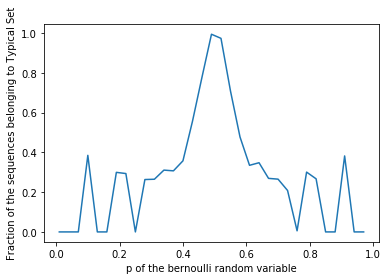

In [128]:
plt.plot(set_p,set_t)
print(set_t)
plt.xlabel("p of the bernoulli random variable")
plt.ylabel("Fraction of the sequences belonging to Typical Set")
plt.show()




  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]


  1%|▋                                                                          | 933/100000 [00:00<00:10, 9259.54it/s]


  2%|█▌                                                                        | 2046/100000 [00:00<00:10, 9733.28it/s]


  3%|██▎                                                                      | 3174/100000 [00:00<00:09, 10130.87it/s]


  4%|███▎                                                                     | 4460/100000 [00:00<00:09, 10523.23it/s]


  6%|████▎                                                                    | 5832/100000 [00:00<00:08, 11001.14it/s]


  7%|█████▎                                                                   | 7249/100000 [00:00<00:08, 11355.31it/s]


  8%|██████▏                                                                  | 8418/100000 [00:00<00:08, 11426.29it/s]


 10%|███████         

 74%|█████████████████████████████████████████████████████▍                  | 74138/100000 [00:07<00:02, 11567.22it/s]


 75%|██████████████████████████████████████████████████████▏                 | 75317/100000 [00:07<00:02, 11608.07it/s]


 77%|███████████████████████████████████████████████████████                 | 76561/100000 [00:07<00:01, 11821.06it/s]


 78%|███████████████████████████████████████████████████████▉                | 77748/100000 [00:07<00:01, 11705.34it/s]


 79%|████████████████████████████████████████████████████████▊               | 78990/100000 [00:07<00:01, 11885.98it/s]


 80%|█████████████████████████████████████████████████████████▊              | 80212/100000 [00:07<00:01, 11983.50it/s]


 81%|██████████████████████████████████████████████████████████▋             | 81498/100000 [00:07<00:01, 12207.32it/s]


 83%|███████████████████████████████████████████████████████████▌            | 82751/100000 [00:07<00:01, 12275.00it/s]


 84%|███████████████████

epsilon 0.001
0.11643
epsilon 0.006
0.38752
epsilon 0.011
0.38752
epsilon 0.016
0.38752
epsilon 0.021
0.38752
epsilon 0.026
0.38752
epsilon 0.031
0.38752
epsilon 0.036
0.38752
epsilon 0.041
0.38752
epsilon 0.046
0.38752
epsilon 0.051
0.38752
epsilon 0.056
0.38752
epsilon 0.061
0.38752
epsilon 0.066
0.38752
epsilon 0.071
0.38752
epsilon 0.076
0.38752
epsilon 0.081
0.38752
epsilon 0.086
0.38752
epsilon 0.091
0.38752
epsilon 0.096
0.38752
epsilon 0.101
0.38752
epsilon 0.106
0.38752
epsilon 0.111
0.38752
epsilon 0.116
0.38752
epsilon 0.121
0.38752
epsilon 0.126
0.38752
epsilon 0.131
0.38752
epsilon 0.136
0.38752
epsilon 0.141
0.38752
epsilon 0.146
0.38752
epsilon 0.151
0.38752
epsilon 0.156
0.38752
epsilon 0.161
0.38752
epsilon 0.166
0.38752
epsilon 0.171
0.38752
epsilon 0.176
0.38752
epsilon 0.181
0.38752
epsilon 0.186
0.38752
epsilon 0.191
0.38752
epsilon 0.196
0.38752
epsilon 0.201
0.38752
epsilon 0.206
0.38752
epsilon 0.211
0.38752
epsilon 0.216
0.38752
epsilon 0.221
0.38752
epsilon 0.

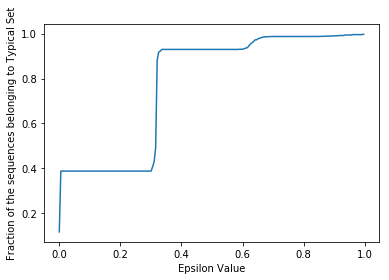

In [157]:
# epsilon vary
s=bernoulli_seq(n,p,num_samples)
freq_d=freq_dict(s)
prob_d,mean,variance=prob_dict(freq_d,num_samples)
set_epsilon=[]
set_t=[]
for i in range(1,1000,5):
    epsilon=i/1000
    print("epsilon "+str(epsilon))
    t=typical_set_prob(n,entropy(p),prob_d,freq_d,num_samples)
    set_epsilon.append(epsilon)
    set_t.append(t)
    print(t)
plt.plot(set_epsilon,set_t)
print(set_t)
plt.xlabel("Epsilon Value")
plt.ylabel("Fraction of the sequences belonging to Typical Set")
plt.show()




  0%|                                                                                           | 0/23 [00:00<?, ?it/s]

sequence length 2






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▌                                                                          | 698/100000 [00:00<00:14, 6975.28it/s]



  1%|█                                                                         | 1393/100000 [00:00<00:14, 6955.60it/s]



  2%|█▌                                                                        | 2123/100000 [00:00<00:13, 7053.38it/s]



  3%|██▏                                                                       | 3025/100000 [00:00<00:12, 7527.03it/s]



  4%|██▊                                                                       | 3871/100000 [00:00<00:12, 7782.87it/s]



  5%|███▌                                                                      | 4752/100000 [00:00<00:11, 8063.07it/s]



  6%|████▏                                                                     | 5606/100000 [00:00<00:11, 8177.35it/s]



  6%|████▊  

 71%|███████████████████████████████████████████████████▍                     | 70508/100000 [00:06<00:03, 8384.62it/s]



 71%|████████████████████████████████████████████████████                     | 71366/100000 [00:07<00:03, 7855.65it/s]



 72%|████████████████████████████████████████████████████▋                    | 72181/100000 [00:07<00:03, 7907.19it/s]



 73%|█████████████████████████████████████████████████████▎                   | 73034/100000 [00:07<00:03, 8080.69it/s]



 74%|██████████████████████████████████████████████████████                   | 74142/100000 [00:07<00:02, 8728.00it/s]



 75%|██████████████████████████████████████████████████████▊                  | 75038/100000 [00:07<00:02, 8635.90it/s]



 76%|███████████████████████████████████████████████████████▍                 | 75918/100000 [00:07<00:02, 8489.49it/s]



 77%|████████████████████████████████████████████████████████                 | 76779/100000 [00:07<00:02, 8387.17it/s]



 78%|███████████

1.0





  4%|███▌                                                                               | 1/23 [00:11<04:06, 11.21s/it]

sequence length 3






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 978/100000 [00:00<00:10, 9687.74it/s]



  2%|█▌                                                                       | 2132/100000 [00:00<00:09, 10174.87it/s]



  3%|██▎                                                                      | 3160/100000 [00:00<00:09, 10188.32it/s]



  4%|███                                                                      | 4221/100000 [00:00<00:09, 10281.25it/s]



  5%|███▉                                                                     | 5404/100000 [00:00<00:08, 10685.00it/s]



  6%|████▋                                                                    | 6441/100000 [00:00<00:08, 10574.30it/s]



  8%|█████▍                                                                   | 7524/100000 [00:00<00:08, 10640.39it/s]



  9%|██████▎

 66%|███████████████████████████████████████████████▍                        | 65906/100000 [00:07<00:03, 11098.31it/s]



 67%|████████████████████████████████████████████████▍                       | 67197/100000 [00:07<00:02, 11579.07it/s]



 68%|█████████████████████████████████████████████████▎                      | 68440/100000 [00:07<00:02, 11804.65it/s]



 70%|██████████████████████████████████████████████████▏                     | 69628/100000 [00:07<00:02, 11779.70it/s]



 71%|███████████████████████████████████████████████████▋                     | 70811/100000 [00:08<00:03, 8059.83it/s]



 72%|████████████████████████████████████████████████████▍                    | 71779/100000 [00:08<00:03, 8282.97it/s]



 73%|█████████████████████████████████████████████████████▏                   | 72813/100000 [00:08<00:03, 8793.56it/s]



 74%|█████████████████████████████████████████████████████▉                   | 73948/100000 [00:08<00:02, 9425.72it/s]



 75%|███████████

1.0





  9%|███████▏                                                                           | 2/23 [00:22<03:54, 11.19s/it]

sequence length 4






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▊                                                                        | 1086/100000 [00:00<00:09, 10816.33it/s]



  2%|█▋                                                                       | 2299/100000 [00:00<00:08, 11071.24it/s]



  4%|██▌                                                                      | 3565/100000 [00:00<00:08, 11500.50it/s]



  5%|███▍                                                                     | 4783/100000 [00:00<00:08, 11679.63it/s]



  6%|████▍                                                                    | 6085/100000 [00:00<00:07, 12018.15it/s]



  7%|█████▎                                                                   | 7325/100000 [00:00<00:07, 12095.49it/s]



  9%|██████▎                                                                  | 8601/100000 [00:00<00:07, 12255.24it/s]



 10%|███████

 81%|██████████████████████████████████████████████████████████▏             | 80893/100000 [00:06<00:01, 10711.50it/s]



 82%|███████████████████████████████████████████████████████████▏            | 82128/100000 [00:06<00:01, 11131.01it/s]



 83%|████████████████████████████████████████████████████████████            | 83437/100000 [00:07<00:01, 11527.91it/s]



 85%|████████████████████████████████████████████████████████████▉           | 84612/100000 [00:07<00:01, 11527.21it/s]



 86%|█████████████████████████████████████████████████████████████▊          | 85780/100000 [00:07<00:01, 11442.42it/s]



 87%|██████████████████████████████████████████████████████████████▋         | 87032/100000 [00:07<00:01, 11733.16it/s]



 88%|███████████████████████████████████████████████████████████████▌        | 88250/100000 [00:07<00:00, 11755.48it/s]



 89%|████████████████████████████████████████████████████████████████▍       | 89478/100000 [00:07<00:00, 11903.64it/s]



 91%|███████████

1.0





 13%|██████████▊                                                                        | 3/23 [00:31<03:29, 10.49s/it]

sequence length 5






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 894/100000 [00:00<00:11, 8931.60it/s]



  2%|█▌                                                                        | 2091/100000 [00:00<00:10, 9575.84it/s]



  3%|██▏                                                                       | 2937/100000 [00:00<00:10, 9208.33it/s]



  4%|██▊                                                                       | 3784/100000 [00:00<00:10, 8945.42it/s]



  5%|███▍                                                                      | 4649/100000 [00:00<00:10, 8840.80it/s]



  6%|████▏                                                                     | 5649/100000 [00:00<00:10, 9151.75it/s]



  7%|████▉                                                                     | 6691/100000 [00:00<00:09, 9481.79it/s]



  8%|█████▌ 

 75%|█████████████████████████████████████████████████████▉                  | 74922/100000 [00:06<00:02, 11576.35it/s]



 76%|██████████████████████████████████████████████████████▊                 | 76081/100000 [00:06<00:02, 11409.75it/s]



 77%|███████████████████████████████████████████████████████▋                | 77273/100000 [00:07<00:01, 11538.62it/s]



 78%|████████████████████████████████████████████████████████▍               | 78459/100000 [00:07<00:01, 11631.28it/s]



 80%|█████████████████████████████████████████████████████████▎              | 79678/100000 [00:07<00:01, 11715.56it/s]



 81%|██████████████████████████████████████████████████████████▏             | 80901/100000 [00:07<00:01, 11771.05it/s]



 82%|███████████████████████████████████████████████████████████             | 82079/100000 [00:07<00:01, 11704.99it/s]



 83%|████████████████████████████████████████████████████████████            | 83347/100000 [00:07<00:01, 11847.40it/s]



 85%|███████████

1.0





 17%|██████████████▍                                                                    | 4/23 [00:40<03:11, 10.07s/it]

sequence length 6






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▊                                                                        | 1032/100000 [00:00<00:09, 10159.68it/s]



  2%|█▋                                                                       | 2238/100000 [00:00<00:09, 10557.84it/s]



  3%|██▍                                                                      | 3270/100000 [00:00<00:09, 10474.78it/s]



  4%|███▎                                                                     | 4460/100000 [00:00<00:08, 10861.46it/s]



  6%|████▏                                                                    | 5687/100000 [00:00<00:08, 11248.01it/s]



  7%|█████                                                                    | 6894/100000 [00:00<00:08, 11480.00it/s]



  8%|█████▉                                                                   | 8116/100000 [00:00<00:07, 11659.23it/s]



  9%|██████▋

 79%|████████████████████████████████████████████████████████▉               | 79096/100000 [00:06<00:01, 11733.35it/s]



 80%|█████████████████████████████████████████████████████████▊              | 80272/100000 [00:06<00:01, 11709.77it/s]



 81%|██████████████████████████████████████████████████████████▋             | 81445/100000 [00:06<00:01, 11569.26it/s]



 83%|███████████████████████████████████████████████████████████▍            | 82604/100000 [00:07<00:01, 11539.74it/s]



 84%|████████████████████████████████████████████████████████████▍           | 83867/100000 [00:07<00:01, 11785.50it/s]



 85%|█████████████████████████████████████████████████████████████▏          | 85048/100000 [00:07<00:01, 11769.16it/s]



 86%|██████████████████████████████████████████████████████████████          | 86227/100000 [00:07<00:01, 11707.76it/s]



 87%|██████████████████████████████████████████████████████████████▉         | 87399/100000 [00:07<00:01, 10901.50it/s]



 89%|███████████

1.0





 22%|██████████████████                                                                 | 5/23 [00:49<02:53,  9.66s/it]

sequence length 7






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                         | 1001/100000 [00:00<00:09, 9912.99it/s]



  2%|█▌                                                                       | 2197/100000 [00:00<00:09, 10443.42it/s]



  3%|██▍                                                                      | 3275/100000 [00:00<00:09, 10425.75it/s]



  4%|███▎                                                                     | 4460/100000 [00:00<00:08, 10810.28it/s]



  6%|████                                                                     | 5559/100000 [00:00<00:08, 10830.28it/s]



  7%|████▊                                                                    | 6624/100000 [00:00<00:08, 10766.53it/s]



  8%|█████▋                                                                   | 7803/100000 [00:00<00:08, 11035.92it/s]



  9%|██████▍

 72%|███████████████████████████████████████████████████▉                    | 72168/100000 [00:06<00:02, 10824.77it/s]



 73%|████████████████████████████████████████████████████▊                   | 73376/100000 [00:07<00:02, 11172.15it/s]



 75%|█████████████████████████████████████████████████████▋                  | 74501/100000 [00:07<00:02, 11194.22it/s]



 76%|██████████████████████████████████████████████████████▍                 | 75626/100000 [00:07<00:02, 11122.66it/s]



 77%|███████████████████████████████████████████████████████▎                | 76742/100000 [00:07<00:02, 11121.32it/s]



 78%|████████████████████████████████████████████████████████                | 77934/100000 [00:07<00:01, 11225.11it/s]



 79%|████████████████████████████████████████████████████████▉               | 79066/100000 [00:07<00:01, 11153.51it/s]



 80%|█████████████████████████████████████████████████████████▊              | 80264/100000 [00:07<00:01, 11343.81it/s]



 81%|███████████

1.0





 26%|█████████████████████▋                                                             | 6/23 [00:58<02:44,  9.65s/it]

sequence length 8






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▌                                                                          | 793/100000 [00:00<00:12, 7680.26it/s]



  2%|█▍                                                                        | 1872/100000 [00:00<00:11, 8330.52it/s]



  3%|██▏                                                                       | 2966/100000 [00:00<00:10, 8952.73it/s]



  4%|██▉                                                                       | 4025/100000 [00:00<00:10, 9386.85it/s]



  5%|███▊                                                                      | 5074/100000 [00:00<00:09, 9687.82it/s]



  6%|████▌                                                                     | 6138/100000 [00:00<00:09, 9955.08it/s]



  7%|█████▎                                                                   | 7252/100000 [00:00<00:09, 10282.35it/s]



  8%|██████ 

 73%|████████████████████████████████████████████████████▍                   | 72809/100000 [00:06<00:02, 10865.82it/s]



 74%|█████████████████████████████████████████████████████▎                  | 74015/100000 [00:06<00:02, 11193.03it/s]



 75%|██████████████████████████████████████████████████████                  | 75138/100000 [00:06<00:02, 11176.32it/s]



 76%|██████████████████████████████████████████████████████▉                 | 76309/100000 [00:07<00:02, 11201.62it/s]



 77%|███████████████████████████████████████████████████████▊                | 77431/100000 [00:07<00:02, 11014.02it/s]



 79%|████████████████████████████████████████████████████████▌               | 78535/100000 [00:07<00:01, 11020.72it/s]



 80%|█████████████████████████████████████████████████████████▎              | 79639/100000 [00:07<00:01, 10903.45it/s]



 81%|██████████████████████████████████████████████████████████▏             | 80731/100000 [00:07<00:01, 10888.97it/s]



 82%|███████████

1.0





 30%|█████████████████████████▎                                                         | 7/23 [01:07<02:32,  9.56s/it]

sequence length 9






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 969/100000 [00:00<00:10, 9673.56it/s]



  2%|█▌                                                                       | 2193/100000 [00:00<00:09, 10222.42it/s]



  3%|██▍                                                                      | 3368/100000 [00:00<00:09, 10583.09it/s]



  5%|███▎                                                                     | 4552/100000 [00:00<00:08, 10879.95it/s]



  6%|████                                                                     | 5625/100000 [00:00<00:08, 10791.40it/s]



  7%|████▉                                                                    | 6770/100000 [00:00<00:08, 10980.86it/s]



  8%|█████▋                                                                   | 7778/100000 [00:00<00:08, 10660.60it/s]



  9%|██████▍

 76%|██████████████████████████████████████████████████████▉                 | 76231/100000 [00:06<00:02, 10962.65it/s]



 77%|███████████████████████████████████████████████████████▋                | 77332/100000 [00:06<00:02, 10856.00it/s]



 78%|████████████████████████████████████████████████████████▍               | 78421/100000 [00:06<00:01, 10793.37it/s]



 80%|█████████████████████████████████████████████████████████▎              | 79541/100000 [00:07<00:01, 10880.68it/s]



 81%|██████████████████████████████████████████████████████████▏             | 80752/100000 [00:07<00:01, 11115.29it/s]



 82%|██████████████████████████████████████████████████████████▉             | 81920/100000 [00:07<00:01, 11247.72it/s]



 83%|███████████████████████████████████████████████████████████▊            | 83145/100000 [00:07<00:01, 11433.63it/s]



 84%|████████████████████████████████████████████████████████████▋           | 84291/100000 [00:07<00:01, 11425.47it/s]



 85%|███████████

1.0





 35%|████████████████████████████▊                                                      | 8/23 [01:16<02:20,  9.39s/it]

sequence length 10






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                         | 1003/100000 [00:00<00:10, 9759.31it/s]



  2%|█▍                                                                        | 2022/100000 [00:00<00:09, 9883.65it/s]



  3%|██▎                                                                      | 3164/100000 [00:00<00:09, 10296.95it/s]



  4%|███▏                                                                     | 4327/100000 [00:00<00:08, 10639.47it/s]



  5%|████                                                                     | 5480/100000 [00:00<00:08, 10886.17it/s]



  7%|████▊                                                                    | 6635/100000 [00:00<00:08, 11073.33it/s]



  8%|█████▋                                                                   | 7716/100000 [00:00<00:08, 10900.58it/s]



  9%|██████▍

 75%|██████████████████████████████████████████████████████▋                  | 74943/100000 [00:06<00:02, 8486.16it/s]



 76%|███████████████████████████████████████████████████████▎                 | 75814/100000 [00:06<00:02, 8531.21it/s]



 77%|████████████████████████████████████████████████████████                 | 76854/100000 [00:07<00:02, 9007.82it/s]



 78%|████████████████████████████████████████████████████████▉                | 78049/100000 [00:07<00:02, 9641.33it/s]



 79%|█████████████████████████████████████████████████████████               | 79195/100000 [00:07<00:02, 10072.52it/s]



 80%|█████████████████████████████████████████████████████████▊              | 80287/100000 [00:07<00:01, 10250.57it/s]



 81%|███████████████████████████████████████████████████████████▎             | 81329/100000 [00:07<00:01, 9628.22it/s]



 82%|████████████████████████████████████████████████████████████             | 82312/100000 [00:07<00:01, 8950.02it/s]



 83%|███████████

0.99859





 39%|████████████████████████████████▍                                                  | 9/23 [01:26<02:11,  9.39s/it]

sequence length 11






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 990/100000 [00:00<00:10, 9873.83it/s]



  2%|█▌                                                                       | 2081/100000 [00:00<00:09, 10143.44it/s]



  3%|██▎                                                                      | 3175/100000 [00:00<00:09, 10260.54it/s]



  4%|███▏                                                                     | 4297/100000 [00:00<00:09, 10516.13it/s]



  5%|███▉                                                                     | 5457/100000 [00:00<00:08, 10701.19it/s]



  7%|████▊                                                                    | 6572/100000 [00:00<00:08, 10815.13it/s]



  8%|█████▌                                                                   | 7699/100000 [00:00<00:08, 10938.70it/s]



  9%|██████▍

 75%|█████████████████████████████████████████████████████▋                  | 74562/100000 [00:06<00:02, 11288.37it/s]



 76%|██████████████████████████████████████████████████████▌                 | 75773/100000 [00:06<00:02, 11424.71it/s]



 77%|███████████████████████████████████████████████████████▍                | 76917/100000 [00:07<00:02, 11399.11it/s]



 78%|████████████████████████████████████████████████████████▏               | 78058/100000 [00:07<00:01, 11073.60it/s]



 79%|█████████████████████████████████████████████████████████               | 79224/100000 [00:07<00:01, 11134.23it/s]



 80%|█████████████████████████████████████████████████████████▊              | 80340/100000 [00:07<00:01, 10951.33it/s]



 81%|██████████████████████████████████████████████████████████▋             | 81438/100000 [00:07<00:01, 10775.75it/s]



 83%|███████████████████████████████████████████████████████████▍            | 82518/100000 [00:07<00:01, 10775.12it/s]



 84%|███████████

0.99087





 43%|███████████████████████████████████▋                                              | 10/23 [01:35<02:01,  9.36s/it]

sequence length 12






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▌                                                                          | 799/100000 [00:00<00:12, 7844.00it/s]



  2%|█▎                                                                        | 1850/100000 [00:00<00:11, 8430.31it/s]



  3%|██                                                                        | 2865/100000 [00:00<00:11, 8795.25it/s]



  4%|██▉                                                                       | 3990/100000 [00:00<00:10, 9321.13it/s]



  5%|███▋                                                                      | 5042/100000 [00:00<00:09, 9621.11it/s]



  6%|████▍                                                                     | 6072/100000 [00:00<00:09, 9813.85it/s]



  7%|█████▎                                                                   | 7237/100000 [00:00<00:09, 10274.00it/s]



  8%|██████ 

 71%|███████████████████████████████████████████████████                     | 70990/100000 [00:06<00:02, 10653.20it/s]



 72%|███████████████████████████████████████████████████▉                    | 72057/100000 [00:06<00:02, 10474.56it/s]



 73%|████████████████████████████████████████████████████▋                   | 73107/100000 [00:07<00:02, 10335.33it/s]



 74%|█████████████████████████████████████████████████████▍                  | 74181/100000 [00:07<00:02, 10372.50it/s]



 75%|██████████████████████████████████████████████████████▏                 | 75232/100000 [00:07<00:02, 10331.10it/s]



 76%|██████████████████████████████████████████████████████▉                 | 76318/100000 [00:07<00:02, 10416.51it/s]



 77%|███████████████████████████████████████████████████████▋                | 77381/100000 [00:07<00:02, 10358.01it/s]



 78%|████████████████████████████████████████████████████████▍               | 78418/100000 [00:07<00:02, 10311.90it/s]



 79%|███████████

0.96031





 48%|███████████████████████████████████████▏                                          | 11/23 [01:45<01:53,  9.49s/it]

sequence length 13






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 952/100000 [00:00<00:10, 9394.45it/s]



  2%|█▍                                                                        | 1997/100000 [00:00<00:10, 9681.51it/s]



  3%|██▎                                                                       | 3075/100000 [00:00<00:09, 9963.85it/s]



  4%|██▉                                                                       | 4049/100000 [00:00<00:09, 9887.33it/s]



  5%|███▋                                                                     | 5114/100000 [00:00<00:09, 10087.73it/s]



  6%|████▌                                                                    | 6220/100000 [00:00<00:09, 10355.63it/s]



  7%|█████▎                                                                   | 7271/100000 [00:00<00:08, 10401.42it/s]



  8%|██████ 

 73%|████████████████████████████████████████████████████▉                   | 73442/100000 [00:06<00:02, 11144.75it/s]



 75%|█████████████████████████████████████████████████████▋                  | 74600/100000 [00:06<00:02, 11237.52it/s]



 76%|██████████████████████████████████████████████████████▌                 | 75725/100000 [00:06<00:02, 11214.09it/s]



 77%|███████████████████████████████████████████████████████▍                | 76931/100000 [00:07<00:02, 11326.59it/s]



 78%|████████████████████████████████████████████████████████▏               | 78065/100000 [00:07<00:01, 11253.23it/s]



 79%|█████████████████████████████████████████████████████████               | 79198/100000 [00:07<00:01, 11224.85it/s]



 80%|█████████████████████████████████████████████████████████▊              | 80344/100000 [00:07<00:01, 11249.41it/s]



 81%|██████████████████████████████████████████████████████████▋             | 81470/100000 [00:07<00:01, 11087.23it/s]



 83%|███████████

0.9225





 52%|██████████████████████████████████████████▊                                       | 12/23 [01:54<01:44,  9.46s/it]

sequence length 14






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 960/100000 [00:00<00:10, 9535.65it/s]



  2%|█▍                                                                        | 1976/100000 [00:00<00:10, 9705.70it/s]



  3%|██▎                                                                      | 3083/100000 [00:00<00:09, 10053.42it/s]



  4%|███                                                                      | 4231/100000 [00:00<00:09, 10421.12it/s]



  5%|███▉                                                                     | 5353/100000 [00:00<00:08, 10645.50it/s]



  6%|████▋                                                                    | 6423/100000 [00:00<00:08, 10631.89it/s]



  7%|█████▍                                                                   | 7424/100000 [00:00<00:08, 10312.18it/s]



  8%|██████▏

 72%|███████████████████████████████████████████████████▋                    | 71758/100000 [00:06<00:02, 10321.87it/s]



 73%|█████████████████████████████████████████████████████▏                   | 72794/100000 [00:06<00:02, 9757.54it/s]



 74%|█████████████████████████████████████████████████████▉                   | 73826/100000 [00:06<00:02, 9901.00it/s]



 75%|█████████████████████████████████████████████████████▉                  | 74928/100000 [00:07<00:02, 10104.71it/s]



 76%|██████████████████████████████████████████████████████▋                 | 75962/100000 [00:07<00:02, 10169.31it/s]



 77%|███████████████████████████████████████████████████████▍                | 77031/100000 [00:07<00:02, 10299.22it/s]



 78%|████████████████████████████████████████████████████████▎               | 78168/100000 [00:07<00:02, 10523.33it/s]



 79%|█████████████████████████████████████████████████████████               | 79267/100000 [00:07<00:01, 10615.94it/s]



 80%|███████████

0.77893





 57%|██████████████████████████████████████████████▎                                   | 13/23 [02:04<01:35,  9.51s/it]

sequence length 15






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 954/100000 [00:00<00:10, 9461.55it/s]



  2%|█▍                                                                        | 1989/100000 [00:00<00:10, 9687.34it/s]



  3%|██▏                                                                       | 2992/100000 [00:00<00:09, 9783.42it/s]



  4%|██▉                                                                       | 4038/100000 [00:00<00:09, 9971.94it/s]



  5%|███▋                                                                     | 5097/100000 [00:00<00:09, 10125.09it/s]



  6%|████▍                                                                    | 6107/100000 [00:00<00:09, 10112.60it/s]



  7%|█████▎                                                                   | 7284/100000 [00:00<00:08, 10453.27it/s]



  8%|██████▏

 71%|███████████████████████████████████████████████████▎                    | 71338/100000 [00:06<00:02, 10949.50it/s]



 72%|████████████████████████████████████████████████████▏                   | 72469/100000 [00:06<00:02, 11048.19it/s]



 74%|████████████████████████████████████████████████████▉                   | 73575/100000 [00:06<00:02, 10995.31it/s]



 75%|█████████████████████████████████████████████████████▊                  | 74676/100000 [00:07<00:02, 10997.85it/s]



 76%|██████████████████████████████████████████████████████▌                 | 75777/100000 [00:07<00:02, 10844.61it/s]



 77%|███████████████████████████████████████████████████████▎                | 76863/100000 [00:07<00:02, 10671.18it/s]



 78%|████████████████████████████████████████████████████████▏               | 77967/100000 [00:07<00:02, 10667.00it/s]



 79%|████████████████████████████████████████████████████████▉               | 79035/100000 [00:07<00:01, 10614.91it/s]



 80%|███████████

0.75595





 61%|█████████████████████████████████████████████████▉                                | 14/23 [02:14<01:26,  9.60s/it]

sequence length 16






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 961/100000 [00:00<00:10, 9381.33it/s]



  2%|█▍                                                                        | 1991/100000 [00:00<00:10, 9637.94it/s]



  3%|██▏                                                                       | 3016/100000 [00:00<00:09, 9788.62it/s]



  4%|███                                                                       | 4062/100000 [00:00<00:09, 9902.96it/s]



  5%|███▋                                                                     | 5114/100000 [00:00<00:09, 10046.23it/s]



  6%|████▌                                                                    | 6253/100000 [00:00<00:09, 10309.42it/s]



  7%|█████▎                                                                   | 7250/100000 [00:00<00:09, 10184.08it/s]



  8%|██████ 

 70%|██████████████████████████████████████████████████▏                     | 69624/100000 [00:06<00:02, 10395.62it/s]



 71%|██████████████████████████████████████████████████▉                     | 70741/100000 [00:06<00:02, 10496.46it/s]



 72%|███████████████████████████████████████████████████▋                    | 71798/100000 [00:07<00:02, 10512.76it/s]



 73%|████████████████████████████████████████████████████▍                   | 72851/100000 [00:07<00:02, 10507.93it/s]



 74%|█████████████████████████████████████████████████████▏                  | 73903/100000 [00:07<00:02, 10233.93it/s]



 75%|█████████████████████████████████████████████████████▉                  | 74989/100000 [00:07<00:02, 10321.70it/s]



 76%|██████████████████████████████████████████████████████▊                 | 76090/100000 [00:07<00:02, 10498.69it/s]



 77%|███████████████████████████████████████████████████████▌                | 77208/100000 [00:07<00:02, 10603.89it/s]



 78%|███████████

0.5504





 65%|█████████████████████████████████████████████████████▍                            | 15/23 [02:24<01:17,  9.71s/it]

sequence length 17






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 987/100000 [00:00<00:10, 9780.35it/s]



  2%|█▍                                                                        | 1965/100000 [00:00<00:10, 9780.19it/s]



  3%|██▏                                                                       | 2939/100000 [00:00<00:09, 9759.21it/s]



  4%|██▉                                                                       | 3960/100000 [00:00<00:09, 9889.77it/s]



  5%|███▋                                                                      | 4954/100000 [00:00<00:09, 9899.78it/s]



  6%|████▍                                                                    | 6023/100000 [00:00<00:09, 10099.29it/s]



  7%|█████▏                                                                   | 7118/100000 [00:00<00:09, 10252.63it/s]



  8%|█████▉ 

 71%|███████████████████████████████████████████████████                     | 70893/100000 [00:06<00:02, 10673.19it/s]



 72%|███████████████████████████████████████████████████▊                    | 72006/100000 [00:06<00:02, 10686.57it/s]



 73%|████████████████████████████████████████████████████▋                   | 73092/100000 [00:06<00:02, 10737.57it/s]



 74%|█████████████████████████████████████████████████████▍                  | 74167/100000 [00:07<00:02, 10740.91it/s]



 75%|██████████████████████████████████████████████████████▏                 | 75242/100000 [00:07<00:02, 10674.53it/s]



 76%|██████████████████████████████████████████████████████▉                 | 76310/100000 [00:07<00:02, 10640.17it/s]



 77%|███████████████████████████████████████████████████████▋                | 77398/100000 [00:07<00:02, 10615.13it/s]



 78%|████████████████████████████████████████████████████████▍               | 78460/100000 [00:07<00:02, 10435.95it/s]



 80%|███████████

0.46444





 70%|█████████████████████████████████████████████████████████                         | 16/23 [02:34<01:08,  9.76s/it]

sequence length 18






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 917/100000 [00:00<00:10, 9160.16it/s]



  2%|█▍                                                                        | 1951/100000 [00:00<00:10, 9430.77it/s]



  3%|██▏                                                                       | 3025/100000 [00:00<00:10, 9689.74it/s]



  4%|███                                                                       | 4116/100000 [00:00<00:09, 9945.07it/s]



  5%|███▊                                                                     | 5242/100000 [00:00<00:09, 10298.78it/s]



  6%|████▌                                                                    | 6321/100000 [00:00<00:09, 10349.76it/s]



  7%|█████▍                                                                   | 7436/100000 [00:00<00:08, 10550.70it/s]



  8%|██████▏

 67%|████████████████████████████████████████████████▋                        | 66750/100000 [00:06<00:03, 9979.01it/s]



 68%|████████████████████████████████████████████████▊                       | 67811/100000 [00:06<00:03, 10052.04it/s]



 69%|█████████████████████████████████████████████████▌                      | 68867/100000 [00:07<00:03, 10166.18it/s]



 70%|██████████████████████████████████████████████████▍                     | 70011/100000 [00:07<00:02, 10416.73it/s]



 71%|███████████████████████████████████████████████████▏                    | 71055/100000 [00:07<00:02, 10418.47it/s]



 72%|███████████████████████████████████████████████████▉                    | 72159/100000 [00:07<00:02, 10568.07it/s]



 73%|████████████████████████████████████████████████████▋                   | 73218/100000 [00:07<00:02, 10407.31it/s]



 74%|█████████████████████████████████████████████████████▍                  | 74261/100000 [00:07<00:02, 10274.55it/s]



 75%|███████████

0.0





 74%|████████████████████████████████████████████████████████████▌                     | 17/23 [02:44<00:59,  9.92s/it]

sequence length 19






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 925/100000 [00:00<00:10, 9230.25it/s]



  2%|█▍                                                                        | 1977/100000 [00:00<00:10, 9565.36it/s]



  3%|██▏                                                                       | 3036/100000 [00:00<00:09, 9842.06it/s]



  4%|███                                                                      | 4132/100000 [00:00<00:09, 10148.60it/s]



  5%|███▊                                                                     | 5144/100000 [00:00<00:09, 10111.85it/s]



  6%|████▌                                                                    | 6168/100000 [00:00<00:09, 10118.19it/s]



  7%|█████▎                                                                   | 7228/100000 [00:00<00:09, 10174.78it/s]



  8%|██████ 

 71%|███████████████████████████████████████████████████                     | 70928/100000 [00:06<00:02, 10500.43it/s]



 72%|███████████████████████████████████████████████████▊                    | 71980/100000 [00:06<00:02, 10467.40it/s]



 73%|████████████████████████████████████████████████████▌                   | 73028/100000 [00:07<00:02, 10465.03it/s]



 74%|█████████████████████████████████████████████████████▎                  | 74080/100000 [00:07<00:02, 10453.52it/s]



 75%|██████████████████████████████████████████████████████▏                 | 75274/100000 [00:07<00:02, 10442.65it/s]



 76%|██████████████████████████████████████████████████████▉                 | 76319/100000 [00:07<00:02, 10379.06it/s]



 77%|███████████████████████████████████████████████████████▊                | 77483/100000 [00:07<00:02, 10309.41it/s]



 79%|████████████████████████████████████████████████████████▌               | 78515/100000 [00:07<00:02, 10286.15it/s]



 80%|███████████

0.0





 78%|████████████████████████████████████████████████████████████████▏                 | 18/23 [02:54<00:49,  9.90s/it]

sequence length 20






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 987/100000 [00:00<00:10, 9805.60it/s]



  2%|█▍                                                                        | 2020/100000 [00:00<00:09, 9875.38it/s]



  3%|██▎                                                                       | 3070/100000 [00:00<00:09, 9949.98it/s]



  4%|███                                                                       | 4072/100000 [00:00<00:09, 9955.68it/s]



  5%|███▊                                                                      | 5071/100000 [00:00<00:09, 9948.21it/s]



  6%|████▌                                                                     | 6112/100000 [00:00<00:09, 9969.08it/s]



  7%|█████▏                                                                   | 7152/100000 [00:00<00:09, 10082.51it/s]



  8%|█████▉ 

 70%|██████████████████████████████████████████████████▏                     | 69697/100000 [00:06<00:02, 10334.35it/s]



 71%|██████████████████████████████████████████████████▉                     | 70807/100000 [00:06<00:02, 10198.22it/s]



 72%|███████████████████████████████████████████████████▋                    | 71850/100000 [00:07<00:02, 10225.66it/s]



 73%|████████████████████████████████████████████████████▍                   | 72874/100000 [00:07<00:02, 10203.61it/s]



 74%|█████████████████████████████████████████████████████▏                  | 73895/100000 [00:07<00:02, 10201.21it/s]



 75%|█████████████████████████████████████████████████████▉                  | 74948/100000 [00:07<00:02, 10190.91it/s]



 76%|██████████████████████████████████████████████████████▊                 | 76065/100000 [00:07<00:02, 10449.33it/s]



 77%|███████████████████████████████████████████████████████▌                | 77112/100000 [00:07<00:02, 10021.97it/s]



 78%|███████████

0.0





 83%|███████████████████████████████████████████████████████████████████▋              | 19/23 [03:04<00:39,  9.94s/it]

sequence length 21






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 970/100000 [00:00<00:10, 9491.79it/s]



  2%|█▍                                                                        | 1962/100000 [00:00<00:10, 9592.25it/s]



  3%|██▏                                                                       | 2938/100000 [00:00<00:10, 9629.71it/s]



  4%|██▉                                                                       | 3963/100000 [00:00<00:09, 9722.32it/s]



  5%|███▋                                                                      | 5035/100000 [00:00<00:09, 9893.24it/s]



  6%|████▍                                                                    | 6156/100000 [00:00<00:09, 10028.61it/s]



  7%|█████▎                                                                    | 7117/100000 [00:00<00:09, 9860.64it/s]



  8%|██████ 

 69%|██████████████████████████████████████████████████▍                      | 69170/100000 [00:06<00:03, 9830.70it/s]



 70%|███████████████████████████████████████████████████▎                     | 70311/100000 [00:06<00:02, 9980.27it/s]



 71%|████████████████████████████████████████████████████                     | 71325/100000 [00:07<00:02, 9943.52it/s]



 73%|████████████████████████████████████████████████████▏                   | 72514/100000 [00:07<00:02, 10064.30it/s]



 74%|████████████████████████████████████████████████████▉                   | 73576/100000 [00:07<00:02, 10122.44it/s]



 75%|█████████████████████████████████████████████████████▊                  | 74690/100000 [00:07<00:02, 10308.53it/s]



 76%|██████████████████████████████████████████████████████▌                 | 75737/100000 [00:07<00:02, 10248.76it/s]



 77%|███████████████████████████████████████████████████████▎                | 76825/100000 [00:07<00:02, 10053.95it/s]



 78%|███████████

0.0





 87%|███████████████████████████████████████████████████████████████████████▎          | 20/23 [03:14<00:29,  9.98s/it]

sequence length 22






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 982/100000 [00:00<00:10, 9669.76it/s]



  2%|█▌                                                                        | 2099/100000 [00:00<00:10, 9680.39it/s]



  3%|██▎                                                                       | 3070/100000 [00:00<00:10, 9666.99it/s]



  4%|██▉                                                                       | 4035/100000 [00:00<00:09, 9608.80it/s]



  5%|███▊                                                                      | 5084/100000 [00:00<00:09, 9778.07it/s]



  6%|████▌                                                                    | 6259/100000 [00:00<00:09, 10026.05it/s]



  7%|█████▎                                                                   | 7288/100000 [00:00<00:09, 10089.18it/s]



  8%|██████ 

 69%|██████████████████████████████████████████████████▌                      | 69234/100000 [00:06<00:03, 8679.73it/s]



 70%|███████████████████████████████████████████████████▎                     | 70282/100000 [00:07<00:03, 9104.94it/s]



 71%|████████████████████████████████████████████████████                     | 71254/100000 [00:07<00:03, 9201.64it/s]



 72%|████████████████████████████████████████████████████▊                    | 72341/100000 [00:07<00:02, 9274.31it/s]



 73%|█████████████████████████████████████████████████████▌                   | 73340/100000 [00:07<00:02, 9463.24it/s]



 74%|██████████████████████████████████████████████████████▎                  | 74348/100000 [00:07<00:02, 9627.94it/s]



 75%|███████████████████████████████████████████████████████                  | 75493/100000 [00:07<00:02, 9779.78it/s]



 77%|███████████████████████████████████████████████████████▊                 | 76536/100000 [00:07<00:02, 9932.40it/s]



 78%|███████████

0.0





 91%|██████████████████████████████████████████████████████████████████████████▊       | 21/23 [03:24<00:20, 10.06s/it]

sequence length 23






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                        | 1010/100000 [00:00<00:09, 10029.14it/s]



  2%|█▍                                                                        | 1955/100000 [00:00<00:10, 9773.98it/s]



  3%|██▏                                                                       | 2919/100000 [00:00<00:09, 9715.63it/s]



  4%|██▉                                                                       | 3995/100000 [00:00<00:09, 9897.98it/s]



  5%|███▋                                                                      | 5039/100000 [00:00<00:09, 9946.34it/s]



  6%|████▍                                                                     | 5987/100000 [00:00<00:09, 9681.85it/s]



  7%|█████▏                                                                    | 7012/100000 [00:00<00:09, 9805.35it/s]



  8%|█████▉ 

 68%|█████████████████████████████████████████████████▌                       | 67956/100000 [00:06<00:03, 9913.39it/s]



 69%|██████████████████████████████████████████████████▎                      | 68949/100000 [00:06<00:03, 9755.41it/s]



 70%|███████████████████████████████████████████████████                      | 69979/100000 [00:07<00:03, 9811.89it/s]



 71%|███████████████████████████████████████████████████▊                     | 71019/100000 [00:07<00:02, 9870.41it/s]



 72%|████████████████████████████████████████████████████▌                    | 72046/100000 [00:07<00:02, 9927.00it/s]



 73%|█████████████████████████████████████████████████████▎                   | 73095/100000 [00:07<00:02, 9929.65it/s]



 74%|██████████████████████████████████████████████████████                   | 74103/100000 [00:07<00:02, 9932.54it/s]



 75%|██████████████████████████████████████████████████████▊                  | 75112/100000 [00:07<00:02, 9964.30it/s]



 76%|███████████

0.0





 96%|██████████████████████████████████████████████████████████████████████████████▍   | 22/23 [03:34<00:10, 10.13s/it]

sequence length 24






  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]



  1%|▋                                                                          | 972/100000 [00:00<00:10, 9623.55it/s]



  2%|█▍                                                                        | 1930/100000 [00:00<00:10, 9608.66it/s]



  3%|██▏                                                                       | 2893/100000 [00:00<00:10, 9608.22it/s]



  4%|██▉                                                                       | 3948/100000 [00:00<00:09, 9763.37it/s]



  5%|███▋                                                                      | 4996/100000 [00:00<00:09, 9961.30it/s]



  6%|████▍                                                                     | 5989/100000 [00:00<00:09, 9943.34it/s]



  7%|█████▏                                                                    | 6972/100000 [00:00<00:09, 9881.20it/s]



  8%|█████▉ 

 68%|█████████████████████████████████████████████████▌                       | 67890/100000 [00:06<00:03, 9936.53it/s]



 69%|██████████████████████████████████████████████████▎                      | 68884/100000 [00:06<00:03, 9885.26it/s]



 70%|███████████████████████████████████████████████████                      | 69873/100000 [00:07<00:03, 9794.52it/s]



 71%|███████████████████████████████████████████████████▊                     | 70910/100000 [00:07<00:02, 9850.06it/s]



 72%|███████████████████████████████████████████████████▊                    | 71990/100000 [00:07<00:02, 10055.33it/s]



 73%|████████████████████████████████████████████████████▌                   | 73055/100000 [00:07<00:02, 10164.70it/s]



 74%|█████████████████████████████████████████████████████▎                  | 74073/100000 [00:07<00:02, 10138.87it/s]



 75%|██████████████████████████████████████████████████████                  | 75107/100000 [00:07<00:02, 10098.96it/s]



 76%|███████████

0.0





100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [03:45<00:00,  9.79s/it]


[4, 8, 16, 32, 64, 128, 256, 512, 1023, 2024, 3869, 7342, 12570, 23514, 38472, 46444, 0, 0, 0, 0, 0, 0, 0]


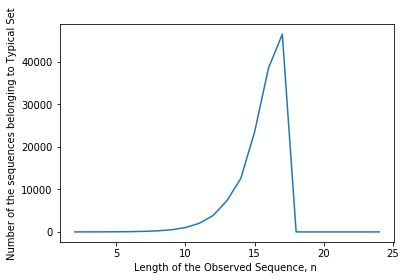

In [136]:
# n vary
set_t=[]
set_n=[]

for i in tqdm.tqdm(range(2,25)):
    n=i
    print("sequence length "+str(n))
    s=bernoulli_seq(n,p,num_samples)
    freq_d=freq_dict(s)
    prob_d,mean,variance=prob_dict(freq_d,num_samples)
    t,e=typical_set_prob(n,entropy(p),prob_d,freq_d,num_samples)
    set_t.append(e)
    set_n.append(n)
    print(t)
plt.plot(set_n,set_t)
print(set_t)
plt.xlabel("Length of the Observed Sequence, n ")
plt.ylabel("Number of the sequences belonging to Typical Set")
plt.show()


In [130]:
#num samples vary
# n vary
set_t=[]
set_num=[]

for i in tqdm.tqdm(range(1,20)):
    num_samples=i*10000
    print("sequence length "+str(n))
    s=bernoulli_seq(n,p,num_samples)
    freq_d=freq_dict(s)
    prob_d,mean,variance=prob_dict(freq_d,num_samples)
    t=typical_set_prob(n,entropy(p),prob_d,freq_d,num_samples)
    set_t.append(t*num_samples)
    set_num.append(num_samples)
    print(t)
plt.plot(set_num,set_t)
print(set_t)
plt.xlabel("Total number of Sequences")
plt.ylabel("Number of the sequences belonging to Typical Set")
plt.show()





  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

sequence length 24






  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]



  4%|███▍                                                                        | 445/10000 [00:00<00:02, 4416.47it/s]



 11%|████████▎                                                                  | 1114/10000 [00:00<00:01, 4906.84it/s]



 18%|█████████████▌                                                             | 1809/10000 [00:00<00:01, 5375.73it/s]



 24%|█████████████████▊                                                         | 2370/10000 [00:00<00:01, 5437.56it/s]



 29%|██████████████████████                                                     | 2942/10000 [00:00<00:01, 5515.71it/s]



 37%|███████████████████████████▍                                               | 3652/10000 [00:00<00:01, 5906.85it/s]



 45%|█████████████████████████████████▍                                         | 4458/10000 [00:00<00:00, 6343.36it/s]



 53%|███████

0.0





  5%|████▎                                                                              | 1/19 [00:01<00:26,  1.45s/it]

sequence length 24






  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]



  4%|██▉                                                                         | 765/20000 [00:00<00:02, 7547.14it/s]



  8%|█████▊                                                                     | 1542/20000 [00:00<00:02, 7606.48it/s]



 12%|████████▊                                                                  | 2353/20000 [00:00<00:02, 7741.18it/s]



 16%|███████████▉                                                               | 3190/20000 [00:00<00:02, 7909.26it/s]



 19%|██████████████▎                                                            | 3802/20000 [00:00<00:02, 7094.51it/s]



 24%|█████████████████▊                                                         | 4766/20000 [00:00<00:01, 7632.79it/s]



 28%|████████████████████▉                                                      | 5598/20000 [00:00<00:01, 7770.10it/s]



 32%|███████

KeyboardInterrupt: 

In [138]:
def plot_histogram(dictionary,num_samples):
    data=[value/num_samples for key,value in dictionary.items()]
    mean=np.mean(data)
    variance=np.var(data)
    print(mean,variance)
    print(len(dictionary))
    n, bins, patches = plt.hist(data, 18, facecolor='g', alpha=0.75)
    plt.ylabel('Number of such Sequences')
    plt.xlabel('Probability of Sequences')
    plt.title('Histogram for AEP')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    #plt.xlim(40, 160)
    #plt.ylim(0, 0.03)
    plt.grid(True)
    plt.show()




  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]


  1%|▋                                                                          | 878/100000 [00:00<00:11, 8716.29it/s]


  2%|█▌                                                                        | 2100/100000 [00:00<00:10, 9404.06it/s]


  3%|██▎                                                                       | 3159/100000 [00:00<00:09, 9705.61it/s]


  4%|███                                                                      | 4258/100000 [00:00<00:09, 10028.07it/s]


  6%|████▏                                                                    | 5723/100000 [00:00<00:08, 10704.64it/s]


  7%|█████                                                                    | 6880/100000 [00:00<00:08, 10949.64it/s]


  8%|█████▊                                                                   | 7959/100000 [00:00<00:08, 10869.20it/s]


  9%|██████▊         

 75%|██████████████████████████████████████████████████████▋                  | 74852/100000 [00:07<00:02, 9357.06it/s]


 76%|███████████████████████████████████████████████████████▎                 | 75809/100000 [00:07<00:02, 9399.65it/s]


 77%|████████████████████████████████████████████████████████                 | 76751/100000 [00:07<00:02, 9357.24it/s]


 78%|████████████████████████████████████████████████████████▋                | 77690/100000 [00:07<00:02, 9346.66it/s]


 79%|█████████████████████████████████████████████████████████▍               | 78733/100000 [00:07<00:02, 9627.81it/s]


 80%|█████████████████████████████████████████████████████████▍              | 79856/100000 [00:07<00:02, 10038.59it/s]


 81%|██████████████████████████████████████████████████████████▎             | 81026/100000 [00:07<00:01, 10458.90it/s]


 82%|███████████████████████████████████████████████████████████             | 82081/100000 [00:07<00:01, 10340.49it/s]


 83%|███████████████████

0.0009765625 9.228027343750002e-09
1024


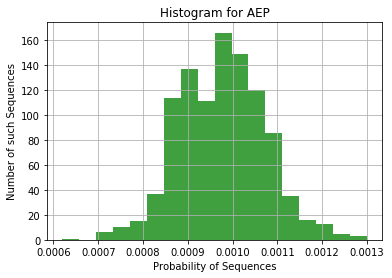

In [140]:
plot_histogram(freq_dict(bernoulli_seq(n,p,num_samples)),num_samples)




  0%|                                                                                           | 0/33 [00:00<?, ?it/s]

prob 0.01





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████▎                                                                      | 694/10000 [00:00<00:01, 6919.91it/s]


 15%|██████████▉                                                                | 1464/10000 [00:00<00:01, 7060.54it/s]


 24%|██████████████████▎                                                        | 2439/10000 [00:00<00:00, 7678.65it/s]


 34%|█████████████████████████▍                                                 | 3399/10000 [00:00<00:00, 8165.82it/s]


 44%|████████████████████████████████▋                                          | 4364/10000 [00:00<00:00, 8557.88it/s]


 53%|███████████████████████████████████████▊                                   | 5310/10000 [00:00<00:00, 8808.39it/s]


 63%|███████████████████████████████████████████████▏                           | 6287/10000 [00:00<00:00, 9053.72it/s]


 72%|████████████████

prob 0.04





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  9%|██████▌                                                                     | 871/10000 [00:00<00:01, 8694.11it/s]


 19%|██████████████                                                             | 1870/10000 [00:00<00:00, 9037.13it/s]


 29%|█████████████████████▍                                                     | 2853/10000 [00:00<00:00, 9222.85it/s]


 38%|████████████████████████████▋                                              | 3818/10000 [00:00<00:00, 9345.89it/s]


 47%|███████████████████████████████████▏                                       | 4697/10000 [00:00<00:00, 9166.61it/s]


 55%|█████████████████████████████████████████                                  | 5471/10000 [00:00<00:00, 7809.63it/s]


 62%|██████████████████████████████████████████████▍                            | 6187/10000 [00:00<00:00, 7013.50it/s]


 70%|████████████████

prob 0.07





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  6%|████▊                                                                       | 638/10000 [00:00<00:01, 6337.88it/s]


 16%|███████████▊                                                               | 1568/10000 [00:00<00:01, 6967.86it/s]


 26%|███████████████████▎                                                       | 2571/10000 [00:00<00:00, 7664.68it/s]


 35%|██████████████████████████                                                 | 3478/10000 [00:00<00:00, 8022.30it/s]


 43%|████████████████████████████████▎                                          | 4302/10000 [00:00<00:00, 8051.00it/s]


 50%|█████████████████████████████████████▋                                     | 5021/10000 [00:00<00:00, 7735.63it/s]


 58%|███████████████████████████████████████████▏                               | 5757/10000 [00:00<00:00, 7602.02it/s]


 66%|████████████████

prob 0.1





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


 10%|███████▋                                                                  | 1044/10000 [00:00<00:00, 10314.96it/s]


 20%|███████████████                                                           | 2043/10000 [00:00<00:00, 10194.16it/s]


 31%|███████████████████████▏                                                  | 3129/10000 [00:00<00:00, 10268.56it/s]


 41%|██████████████████████████████▌                                           | 4133/10000 [00:00<00:00, 10197.41it/s]


 49%|████████████████████████████████████▊                                      | 4906/10000 [00:00<00:00, 8824.78it/s]


 56%|██████████████████████████████████████████▎                                | 5649/10000 [00:00<00:00, 8140.29it/s]


 66%|█████████████████████████████████████████████████▏                         | 6557/10000 [00:00<00:00, 8383.92it/s]


 74%|████████████████

prob 0.13





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  9%|██████▉                                                                     | 909/10000 [00:00<00:01, 8973.79it/s]


 15%|███████████▍                                                               | 1521/10000 [00:00<00:01, 7863.25it/s]


 22%|████████████████▎                                                          | 2180/10000 [00:00<00:01, 7416.19it/s]


 29%|█████████████████████▌                                                     | 2868/10000 [00:00<00:00, 7223.48it/s]


 37%|███████████████████████████▋                                               | 3698/10000 [00:00<00:00, 7512.64it/s]


 45%|██████████████████████████████████                                         | 4544/10000 [00:00<00:00, 7772.27it/s]


 56%|█████████████████████████████████████████▋                                 | 5552/10000 [00:00<00:00, 8267.48it/s]


 66%|████████████████

prob 0.16





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  8%|██████▍                                                                     | 842/10000 [00:00<00:01, 8186.04it/s]


 18%|█████████████▌                                                             | 1813/10000 [00:00<00:00, 8581.10it/s]


 29%|█████████████████████▋                                                     | 2898/10000 [00:00<00:00, 9152.26it/s]


 40%|█████████████████████████████▊                                             | 3976/10000 [00:00<00:00, 9584.85it/s]


 50%|█████████████████████████████████████▌                                     | 5003/10000 [00:00<00:00, 9672.95it/s]


 61%|█████████████████████████████████████████████▍                             | 6051/10000 [00:00<00:00, 9880.36it/s]


 71%|█████████████████████████████████████████████████████                      | 7080/10000 [00:00<00:00, 9988.08it/s]


 81%|████████████████

prob 0.19





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  9%|██████▊                                                                     | 898/10000 [00:00<00:01, 8926.34it/s]


 19%|██████████████▏                                                            | 1893/10000 [00:00<00:00, 9204.16it/s]


 29%|█████████████████████▉                                                     | 2923/10000 [00:00<00:00, 9505.86it/s]


 40%|██████████████████████████████▏                                            | 4022/10000 [00:00<00:00, 9885.96it/s]


 51%|█████████████████████████████████████▊                                    | 5114/10000 [00:00<00:00, 10064.91it/s]


 62%|█████████████████████████████████████████████▌                            | 6150/10000 [00:00<00:00, 10148.85it/s]


 72%|█████████████████████████████████████████████████████                     | 7175/10000 [00:00<00:00, 10142.43it/s]


 82%|████████████████

prob 0.22





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  9%|██████▊                                                                     | 897/10000 [00:00<00:01, 8725.41it/s]


 18%|█████████████▌                                                             | 1802/10000 [00:00<00:00, 8818.75it/s]


 25%|███████████████████                                                        | 2541/10000 [00:00<00:00, 8310.20it/s]


 31%|███████████████████████▏                                                   | 3084/10000 [00:00<00:00, 7160.47it/s]


 36%|███████████████████████████▎                                               | 3640/10000 [00:00<00:00, 6567.87it/s]


 45%|█████████████████████████████████▉                                         | 4524/10000 [00:00<00:00, 7097.67it/s]


 54%|████████████████████████████████████████▊                                  | 5437/10000 [00:00<00:00, 7600.04it/s]


 64%|████████████████

prob 0.25





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  6%|████▊                                                                       | 627/10000 [00:00<00:01, 6239.11it/s]


 14%|██████████▏                                                                | 1364/10000 [00:00<00:01, 6483.14it/s]


 21%|███████████████▌                                                           | 2072/10000 [00:00<00:01, 6640.75it/s]


 29%|█████████████████████▊                                                     | 2916/10000 [00:00<00:01, 7072.99it/s]


 37%|███████████████████████████▍                                               | 3653/10000 [00:00<00:00, 7146.00it/s]


 44%|█████████████████████████████████▎                                         | 4448/10000 [00:00<00:00, 7361.75it/s]


 52%|███████████████████████████████████████▏                                   | 5224/10000 [00:00<00:00, 7464.73it/s]


 60%|████████████████

prob 0.28





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  8%|█████▉                                                                      | 783/10000 [00:00<00:01, 7809.54it/s]


 16%|████████████▎                                                              | 1642/10000 [00:00<00:01, 8027.85it/s]


 23%|█████████████████                                                          | 2273/10000 [00:00<00:01, 7417.56it/s]


 30%|██████████████████████▊                                                    | 3038/10000 [00:00<00:00, 7466.81it/s]


 38%|████████████████████████████▋                                              | 3819/10000 [00:00<00:00, 7515.99it/s]


 46%|██████████████████████████████████▋                                        | 4628/10000 [00:00<00:00, 7661.82it/s]


 54%|████████████████████████████████████████▌                                  | 5411/10000 [00:00<00:00, 7706.43it/s]


 62%|████████████████

prob 0.31





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


 11%|███████▉                                                                  | 1076/10000 [00:00<00:00, 10520.25it/s]


 19%|██████████████▍                                                            | 1922/10000 [00:00<00:00, 9770.27it/s]


 26%|███████████████████▎                                                       | 2580/10000 [00:00<00:00, 8516.96it/s]


 33%|████████████████████████▋                                                  | 3288/10000 [00:00<00:00, 8009.73it/s]


 40%|██████████████████████████████▎                                            | 4046/10000 [00:00<00:00, 7851.80it/s]


 48%|████████████████████████████████████▎                                      | 4846/10000 [00:00<00:00, 7892.03it/s]


 56%|██████████████████████████████████████████▏                                | 5633/10000 [00:00<00:00, 7885.40it/s]


 63%|████████████████

prob 0.34





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████▍                                                                      | 714/10000 [00:00<00:01, 7128.01it/s]


 13%|█████████▉                                                                 | 1317/10000 [00:00<00:01, 6754.53it/s]


 20%|██████████████▉                                                            | 1994/10000 [00:00<00:01, 6741.20it/s]


 27%|████████████████████                                                       | 2672/10000 [00:00<00:01, 6751.00it/s]


 35%|█████████████████████████▉                                                 | 3464/10000 [00:00<00:00, 7060.32it/s]


 43%|███████████████████████████████▉                                           | 4260/10000 [00:00<00:00, 7277.35it/s]


 49%|████████████████████████████████████▊                                      | 4910/10000 [00:00<00:00, 6543.74it/s]


 56%|████████████████

prob 0.37





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████▌                                                                      | 730/10000 [00:00<00:01, 7281.95it/s]


 15%|██████████▉                                                                | 1454/10000 [00:00<00:01, 7265.36it/s]


 22%|████████████████▋                                                          | 2220/10000 [00:00<00:01, 7365.57it/s]


 30%|██████████████████████▋                                                    | 3030/10000 [00:00<00:00, 7552.24it/s]


 39%|█████████████████████████████▎                                             | 3906/10000 [00:00<00:00, 7869.47it/s]


 48%|███████████████████████████████████▉                                       | 4796/10000 [00:00<00:00, 8129.62it/s]


 57%|██████████████████████████████████████████▌                                | 5668/10000 [00:00<00:00, 8298.14it/s]


 67%|████████████████

prob 0.4





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  8%|█████▊                                                                      | 771/10000 [00:00<00:01, 7666.14it/s]


 16%|████████████▏                                                              | 1621/10000 [00:00<00:01, 7892.90it/s]


 22%|████████████████▋                                                          | 2220/10000 [00:00<00:01, 7204.52it/s]


 31%|███████████████████████▍                                                   | 3131/10000 [00:00<00:00, 7684.14it/s]


 42%|███████████████████████████████▏                                           | 4162/10000 [00:00<00:00, 8318.44it/s]


 52%|██████████████████████████████████████▋                                    | 5157/10000 [00:00<00:00, 8732.63it/s]


 61%|██████████████████████████████████████████████                             | 6149/10000 [00:00<00:00, 9048.12it/s]


 70%|████████████████

prob 0.43





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  4%|██▋                                                                         | 361/10000 [00:00<00:02, 3607.04it/s]


  8%|██████▏                                                                     | 819/10000 [00:00<00:02, 3850.65it/s]


 13%|██████████                                                                 | 1343/10000 [00:00<00:02, 4160.37it/s]


 18%|█████████████▋                                                             | 1827/10000 [00:00<00:01, 4323.46it/s]


 22%|████████████████▋                                                          | 2219/10000 [00:00<00:01, 4189.60it/s]


 27%|████████████████████▎                                                      | 2708/10000 [00:00<00:01, 4366.22it/s]


 33%|████████████████████████▌                                                  | 3277/10000 [00:00<00:01, 4692.15it/s]


 39%|████████████████

prob 0.46





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  6%|████▋                                                                       | 612/10000 [00:00<00:01, 6061.19it/s]


 11%|███████▉                                                                   | 1064/10000 [00:00<00:01, 5432.44it/s]


 16%|███████████▉                                                               | 1586/10000 [00:00<00:01, 5359.50it/s]


 20%|███████████████▏                                                           | 2023/10000 [00:00<00:01, 5013.61it/s]


 27%|████████████████████▏                                                      | 2696/10000 [00:00<00:01, 5427.94it/s]


 34%|█████████████████████████▌                                                 | 3408/10000 [00:00<00:01, 5834.54it/s]


 39%|█████████████████████████████▌                                             | 3941/10000 [00:00<00:01, 5651.85it/s]


 45%|████████████████

prob 0.49





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  5%|███▍                                                                        | 458/10000 [00:00<00:02, 4481.93it/s]


  8%|█████▊                                                                      | 761/10000 [00:00<00:02, 3908.57it/s]


 10%|███████▌                                                                    | 991/10000 [00:00<00:02, 3228.22it/s]


 13%|█████████▋                                                                 | 1289/10000 [00:00<00:02, 3148.22it/s]


 16%|████████████▏                                                              | 1622/10000 [00:00<00:02, 3191.77it/s]


 19%|██████████████                                                             | 1881/10000 [00:00<00:02, 2961.53it/s]


 23%|████████████████▉                                                          | 2263/10000 [00:00<00:02, 3164.99it/s]


 27%|████████████████

prob 0.52





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████                                                                       | 668/10000 [00:00<00:01, 6547.35it/s]


 14%|██████████▍                                                                | 1397/10000 [00:00<00:01, 6700.69it/s]


 21%|███████████████▋                                                           | 2096/10000 [00:00<00:01, 6767.77it/s]


 28%|████████████████████▊                                                      | 2780/10000 [00:00<00:01, 6770.76it/s]


 35%|██████████████████████████                                                 | 3477/10000 [00:00<00:00, 6828.95it/s]


 42%|███████████████████████████████▍                                           | 4184/10000 [00:00<00:00, 6882.31it/s]


 49%|████████████████████████████████████▌                                      | 4880/10000 [00:00<00:00, 6898.22it/s]


 56%|████████████████

prob 0.55





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████▍                                                                      | 710/10000 [00:00<00:01, 6894.45it/s]


 15%|███████████                                                                | 1475/10000 [00:00<00:01, 7091.26it/s]


 21%|████████████████                                                           | 2149/10000 [00:00<00:01, 6980.30it/s]


 29%|█████████████████████▍                                                     | 2864/10000 [00:00<00:01, 7011.84it/s]


 35%|██████████████████████████▏                                                | 3484/10000 [00:00<00:00, 6741.93it/s]


 42%|███████████████████████████████▎                                           | 4180/10000 [00:00<00:00, 6793.78it/s]


 50%|█████████████████████████████████████▋                                     | 5019/10000 [00:00<00:00, 7193.90it/s]


 58%|████████████████

prob 0.58





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████▎                                                                      | 705/10000 [00:00<00:01, 6999.43it/s]


 14%|██████████▏                                                                | 1357/10000 [00:00<00:01, 6827.74it/s]


 22%|████████████████▏                                                          | 2164/10000 [00:00<00:01, 7152.17it/s]


 30%|██████████████████████▎                                                    | 2967/10000 [00:00<00:00, 7391.97it/s]


 37%|████████████████████████████                                               | 3737/10000 [00:00<00:00, 7461.64it/s]


 44%|█████████████████████████████████▎                                         | 4438/10000 [00:00<00:00, 7314.24it/s]


 51%|██████████████████████████████████████▏                                    | 5095/10000 [00:00<00:00, 7052.86it/s]


 58%|████████████████

prob 0.61





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  8%|█████▊                                                                      | 757/10000 [00:00<00:01, 7532.72it/s]


 16%|███████████▋                                                               | 1554/10000 [00:00<00:01, 7632.68it/s]


 23%|█████████████████                                                          | 2276/10000 [00:00<00:01, 7484.60it/s]


 31%|███████████████████████▎                                                   | 3108/10000 [00:00<00:00, 7697.34it/s]


 39%|█████████████████████████████▏                                             | 3895/10000 [00:00<00:00, 7734.29it/s]


 47%|███████████████████████████████████▏                                       | 4693/10000 [00:00<00:00, 7787.23it/s]


 55%|█████████████████████████████████████████▌                                 | 5548/10000 [00:00<00:00, 7911.81it/s]


 64%|████████████████

prob 0.64





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


 10%|███████▍                                                                    | 973/10000 [00:00<00:00, 9475.98it/s]


 19%|██████████████▏                                                            | 1898/10000 [00:00<00:00, 9378.98it/s]


 30%|██████████████████████▎                                                    | 2980/10000 [00:00<00:00, 9685.47it/s]


 39%|█████████████████████████████▍                                             | 3929/10000 [00:00<00:00, 9609.49it/s]


 49%|████████████████████████████████████▉                                      | 4932/10000 [00:00<00:00, 9662.07it/s]


 59%|████████████████████████████████████████████▏                              | 5897/10000 [00:00<00:00, 9657.67it/s]


 68%|██████████████████████████████████████████████████▋                        | 6753/10000 [00:00<00:00, 8084.07it/s]


 75%|████████████████

prob 0.67





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████                                                                       | 665/10000 [00:00<00:01, 6633.51it/s]


 14%|██████████▊                                                                | 1447/10000 [00:00<00:01, 6932.34it/s]


 21%|███████████████▋                                                           | 2091/10000 [00:00<00:01, 6764.14it/s]


 28%|█████████████████████                                                      | 2811/10000 [00:00<00:01, 6883.07it/s]


 35%|██████████████████████████▏                                                | 3492/10000 [00:00<00:00, 6853.09it/s]


 42%|███████████████████████████████▋                                           | 4220/10000 [00:00<00:00, 6935.58it/s]


 49%|█████████████████████████████████████                                      | 4943/10000 [00:00<00:00, 7006.56it/s]


 57%|████████████████

prob 0.7





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  8%|█████▉                                                                      | 786/10000 [00:00<00:01, 7851.71it/s]


 16%|████████████▏                                                              | 1627/10000 [00:00<00:01, 8004.99it/s]


 25%|██████████████████▊                                                        | 2505/10000 [00:00<00:00, 8207.25it/s]


 34%|█████████████████████████▎                                                 | 3381/10000 [00:00<00:00, 8348.06it/s]


 43%|████████████████████████████████▍                                          | 4320/10000 [00:00<00:00, 8581.72it/s]


 54%|████████████████████████████████████████▏                                  | 5366/10000 [00:00<00:00, 9052.76it/s]


 63%|███████████████████████████████████████████████▎                           | 6303/10000 [00:00<00:00, 9119.59it/s]


 72%|████████████████

prob 0.73





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████▌                                                                      | 728/10000 [00:00<00:01, 7217.66it/s]


 13%|█████████▊                                                                 | 1315/10000 [00:00<00:01, 6734.58it/s]


 18%|█████████████▎                                                             | 1776/10000 [00:00<00:01, 5896.19it/s]


 23%|█████████████████▎                                                         | 2304/10000 [00:00<00:01, 5684.54it/s]


 30%|██████████████████████▎                                                    | 2982/10000 [00:00<00:01, 5960.73it/s]


 37%|███████████████████████████▊                                               | 3708/10000 [00:00<00:00, 6296.30it/s]


 43%|████████████████████████████████                                           | 4270/10000 [00:00<00:00, 5982.52it/s]


 48%|████████████████

prob 0.76





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  8%|█████▊                                                                      | 764/10000 [00:00<00:01, 7521.76it/s]


 18%|█████████████▍                                                             | 1796/10000 [00:00<00:01, 8115.78it/s]


 27%|███████████████████▉                                                       | 2664/10000 [00:00<00:00, 8264.03it/s]


 32%|████████████████████████▎                                                  | 3243/10000 [00:00<00:01, 5190.13it/s]


 37%|███████████████████████████▉                                               | 3732/10000 [00:00<00:02, 2858.92it/s]


 41%|██████████████████████████████▊                                            | 4116/10000 [00:01<00:02, 2773.77it/s]


 45%|█████████████████████████████████▍                                         | 4463/10000 [00:01<00:01, 2835.01it/s]


 49%|████████████████

prob 0.79





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████                                                                       | 667/10000 [00:00<00:01, 6637.36it/s]


 10%|███████▋                                                                   | 1026/10000 [00:00<00:01, 5282.06it/s]


 16%|████████████▎                                                              | 1639/10000 [00:00<00:01, 5498.95it/s]


 22%|████████████████▌                                                          | 2211/10000 [00:00<00:01, 5554.33it/s]


 28%|█████████████████████▎                                                     | 2849/10000 [00:00<00:01, 5770.70it/s]


 33%|████████████████████████▉                                                  | 3333/10000 [00:00<00:01, 4642.32it/s]


 38%|████████████████████████████▎                                              | 3768/10000 [00:00<00:01, 4287.90it/s]


 46%|████████████████

prob 0.82





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  8%|██████▏                                                                     | 807/10000 [00:00<00:01, 8035.18it/s]


 14%|██████████▎                                                                | 1380/10000 [00:00<00:01, 7152.52it/s]


 17%|████████████▉                                                              | 1720/10000 [00:00<00:02, 4112.82it/s]


 22%|████████████████▏                                                          | 2166/10000 [00:00<00:01, 4209.92it/s]


 25%|██████████████████▊                                                        | 2510/10000 [00:00<00:02, 3322.23it/s]


 28%|█████████████████████▏                                                     | 2818/10000 [00:00<00:02, 3092.55it/s]


 33%|████████████████████████▌                                                  | 3270/10000 [00:00<00:01, 3390.11it/s]


 36%|████████████████

prob 0.85





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  6%|████▌                                                                       | 595/10000 [00:00<00:01, 5896.17it/s]


 12%|████████▋                                                                  | 1158/10000 [00:00<00:01, 5790.70it/s]


 18%|█████████████▍                                                             | 1794/10000 [00:00<00:01, 5942.07it/s]


 22%|████████████████▍                                                          | 2188/10000 [00:00<00:01, 4625.86it/s]


 28%|████████████████████▊                                                      | 2776/10000 [00:00<00:01, 4896.16it/s]


 32%|████████████████████████                                                   | 3203/10000 [00:00<00:01, 4054.96it/s]


 36%|██████████████████████████▉                                                | 3589/10000 [00:00<00:01, 3572.35it/s]


 39%|████████████████

prob 0.88





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  7%|█████▏                                                                      | 682/10000 [00:00<00:01, 6581.22it/s]


 14%|██████████▋                                                                | 1421/10000 [00:00<00:01, 6789.71it/s]


 18%|█████████████▎                                                             | 1780/10000 [00:00<00:01, 4981.76it/s]


 22%|████████████████▊                                                          | 2238/10000 [00:00<00:01, 4851.89it/s]


 28%|████████████████████▋                                                      | 2758/10000 [00:00<00:01, 4945.74it/s]


 32%|████████████████████████▎                                                  | 3240/10000 [00:00<00:01, 4895.49it/s]


 37%|███████████████████████████▌                                               | 3678/10000 [00:00<00:01, 4520.06it/s]


 41%|████████████████

prob 0.91





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  5%|████                                                                        | 529/10000 [00:00<00:01, 5090.58it/s]


 11%|███████▉                                                                   | 1063/10000 [00:00<00:01, 5148.29it/s]


 16%|████████████▏                                                              | 1623/10000 [00:00<00:01, 5266.96it/s]


 22%|████████████████▎                                                          | 2176/10000 [00:00<00:01, 5297.36it/s]


 26%|███████████████████▍                                                       | 2597/10000 [00:00<00:01, 4914.15it/s]


 31%|███████████████████████▌                                                   | 3144/10000 [00:00<00:01, 5063.32it/s]


 37%|███████████████████████████▋                                               | 3690/10000 [00:00<00:01, 5118.20it/s]


 43%|████████████████

prob 0.94





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  3%|██▎                                                                         | 299/10000 [00:00<00:03, 2500.98it/s]


  6%|████▉                                                                       | 645/10000 [00:00<00:03, 2726.81it/s]


 13%|█████████▍                                                                 | 1266/10000 [00:00<00:02, 3276.30it/s]


 20%|██████████████▋                                                            | 1961/10000 [00:00<00:02, 3888.71it/s]


 27%|████████████████████▌                                                      | 2748/10000 [00:00<00:01, 4579.05it/s]


 35%|█████████████████████████▉                                                 | 3462/10000 [00:00<00:01, 5094.45it/s]


 40%|██████████████████████████████▎                                            | 4036/10000 [00:00<00:01, 5090.88it/s]


 46%|████████████████

prob 0.97





  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


  2%|█▌                                                                          | 208/10000 [00:00<00:04, 2044.21it/s]


  7%|█████▍                                                                      | 719/10000 [00:00<00:03, 2490.15it/s]


 13%|█████████▌                                                                 | 1278/10000 [00:00<00:03, 2905.39it/s]


 17%|█████████████                                                              | 1737/10000 [00:00<00:02, 3257.99it/s]


 24%|█████████████████▊                                                         | 2382/10000 [00:00<00:02, 3808.43it/s]


 33%|████████████████████████▉                                                  | 3318/10000 [00:00<00:01, 4626.05it/s]


 40%|█████████████████████████████▉                                             | 3991/10000 [00:00<00:01, 5099.12it/s]


 47%|████████████████

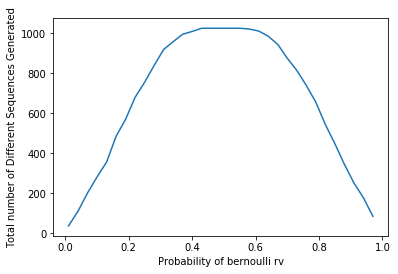

In [124]:
seq=[]
prob=[]
for i in tqdm.tqdm(range(1,100,3)):
    p=i/100
    print("prob "+str(p))
    s=bernoulli_seq(n,p,num_samples)
    freq_d=freq_dict(s)
    seq.append(len(freq_d))
    prob.append(p)
plt.plot(prob,seq)
plt.ylabel("Total number of Different Sequences Generated")
plt.xlabel("Probability of bernoulli rv")
plt.show()

In [151]:
pow(2,17)

131072